# ETM 58D Project - Solar Power Forecasting

## Anılkağan Kantar
## Pınar Köksal 


For the analyisis of the solar power forecasting in KIVANC 2 GES is located in Mersin, we used 4 regression models to select the best pick.

1- Decision tree
2- Linear regression
3- Random forest
4- GLM

In [29]:
options(warn=-1)

require(data.table)
require(ggplot2)
require(lubridate)
require(ggcorrplot)
require(corrplot)
require(GGally)
require(skimr)
require(dplyr)
library(rattle)
library(caret)
library(tidyverse)
library(readxl)
library(magrittr)
library(tidyquant)
library(tsibble)
library(feasts)
library(glmnet)
library(ranger)

options(warn=1)

In [3]:
production=fread("C:/Users/pinar/Desktop/project_data/production.csv")
weatherdata=fread("C:/Users/pinar/Desktop/project_data/long_weather.csv")

# production=fread("C:/ETM58D/project/project_data/production.csv")
# weatherdata=fread("C:/ETM58D/project/project_data/long_weather.csv")

head(production)
head(weatherdata)

date,hour,production
<date>,<int>,<dbl>
2021-02-01,0,0
2021-02-01,1,0
2021-02-01,2,0
2021-02-01,3,0
2021-02-01,4,0
2021-02-01,5,0


date,hour,lat,lon,variable,value
<date>,<int>,<dbl>,<dbl>,<chr>,<dbl>
2021-02-01,0,36.25,33,DSWRF,0
2021-02-01,1,36.25,33,DSWRF,0
2021-02-01,2,36.25,33,DSWRF,0
2021-02-01,3,36.25,33,DSWRF,0
2021-02-01,4,36.25,33,DSWRF,0
2021-02-01,5,36.25,33,DSWRF,0


We plotted the data to see the relationship between production and hour.

date,hour,lat,lon,variable,value,production
<date>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2021-02-01,0,36.25,33.00,DSWRF,0,0
2021-02-01,0,36.25,33.25,DSWRF,0,0
2021-02-01,0,36.25,33.50,DSWRF,0,0
2021-02-01,0,36.50,33.00,DSWRF,0,0
2021-02-01,0,36.50,33.25,DSWRF,0,0
2021-02-01,0,36.50,33.50,DSWRF,0,0


date,hour,production,timestamp
<date>,<int>,<dbl>,<dttm>
2021-02-01,0,0,2021-02-01 00:00:00
2021-02-01,1,0,2021-02-01 01:00:00
2021-02-01,2,0,2021-02-01 02:00:00
2021-02-01,3,0,2021-02-01 03:00:00
2021-02-01,4,0,2021-02-01 04:00:00
2021-02-01,5,0,2021-02-01 05:00:00


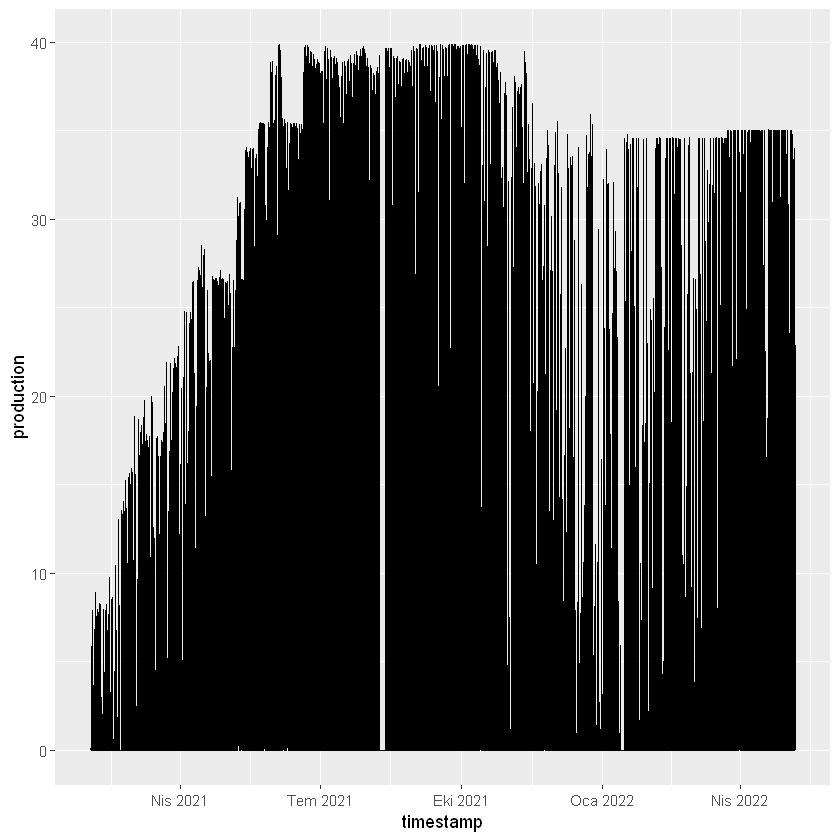

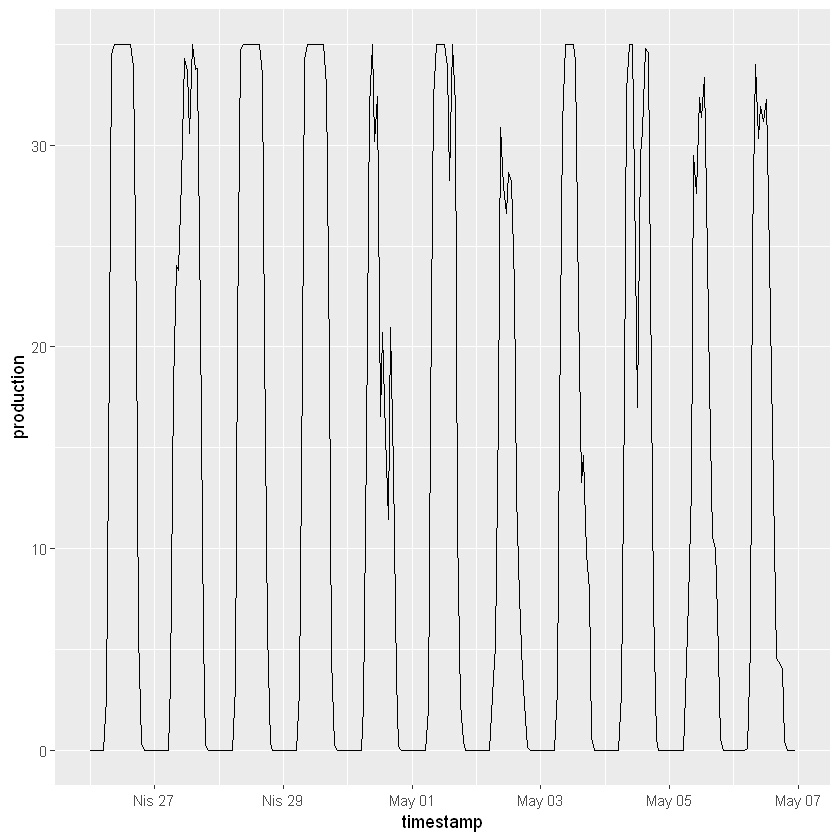

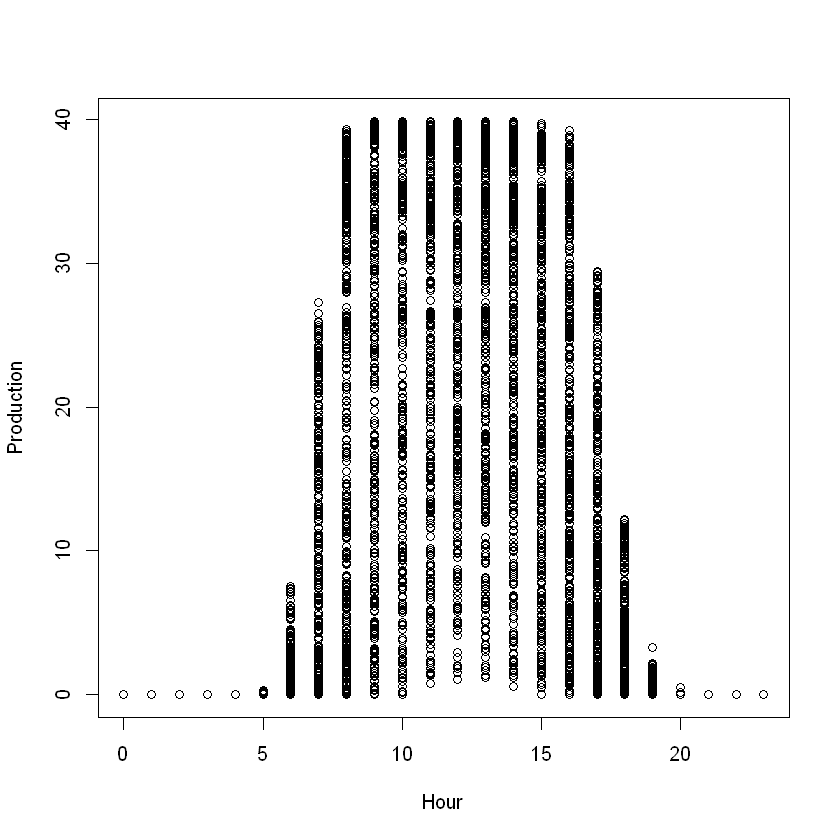

In [4]:
datamerge <- merge(weatherdata,production)
head(datamerge)

#datamerge$production <- as.factor(datamerge$production)

production[,timestamp:=as.Date(date)+dhours(hour)]
head(production)

ggplot(production,aes(x=timestamp,y=production)) + geom_line()

ggplot(production[date>'2022-04-25'],aes(x=timestamp,y=production)) + geom_line()

plot(datamerge$hour,datamerge$production, xlab = "Hour", ylab = "Production")

As the plots show, there is no production between 21 to 5. Therefore, we removed those hours from the data.

date,hour,lat,lon,variable,value,production
<date>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2022-05-06,20,36.50,33.00,TEMP,282.413,0
2022-05-06,20,36.50,33.25,TEMP,285.013,0
2022-05-06,20,36.50,33.50,TEMP,288.913,0
2022-05-06,20,36.75,33.00,TEMP,280.113,0
2022-05-06,20,36.75,33.25,TEMP,285.413,0
2022-05-06,20,36.75,33.50,TEMP,282.713,0


date,hour,lat,lon,variable,value,timestamp
<date>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>
2021-02-01,0,36.5,33.25,DSWRF,0,2021-02-01 00:00:00
2021-02-01,1,36.5,33.25,DSWRF,0,2021-02-01 01:00:00
2021-02-01,2,36.5,33.25,DSWRF,0,2021-02-01 02:00:00
2021-02-01,3,36.5,33.25,DSWRF,0,2021-02-01 03:00:00
2021-02-01,4,36.5,33.25,DSWRF,0,2021-02-01 04:00:00
2021-02-01,5,36.5,33.25,DSWRF,0,2021-02-01 05:00:00


Warning message:
"Removed 20 row(s) containing missing values (geom_path)."
Warning message:
"Removed 20 row(s) containing missing values (geom_path)."


date,hour,production,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,CLOUD_LOW_LAYER_36.5_33.5,CLOUD_LOW_LAYER_36.75_33,...,REL_HUMIDITY_36.75_33.5,TEMP_36.25_33,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-05-06,15,10.23,2.8,0.7,0.0,33.2,8.0,5.3,46.4,...,44.5,289.524,290.424,291.824,285.724,288.624,292.824,282.524,288.624,285.824
2022-05-06,16,4.53,8.5,4.9,0.0,98.4,6.0,5.0,87.6,...,44.2,289.167,290.267,291.867,285.167,288.367,292.567,281.867,287.967,285.367
2022-05-06,17,4.37,9.9,4.3,2.1,90.6,13.0,4.9,84.0,...,44.8,287.913,289.313,291.113,284.013,287.713,292.113,281.113,287.513,285.413
2022-05-06,18,4.05,7.8,4.2,1.4,85.9,16.9,4.9,78.1,...,52.2,287.103,288.403,290.403,283.403,286.503,290.803,281.003,286.903,284.103
2022-05-06,19,0.44,5.8,3.1,1.0,66.5,14.0,4.7,75.8,...,55.2,285.956,287.156,288.656,282.856,286.056,290.256,280.456,286.156,283.656
2022-05-06,20,0.00,5.1,2.5,0.8,65.4,12.2,3.9,76.9,...,60.6,284.613,286.113,288.213,282.413,285.013,288.913,280.113,285.413,282.713


date,hour,production,lat,lon,CLOUD_LOW_LAYER,DSWRF,REL_HUMIDITY,TEMP
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-05-06,20,0,36.50,33.00,65.4,329.040,54.0,282.413
2022-05-06,20,0,36.50,33.25,12.2,375.280,48.2,285.013
2022-05-06,20,0,36.50,33.50,3.9,372.736,41.0,288.913
2022-05-06,20,0,36.75,33.00,76.9,301.712,61.0,280.113
2022-05-06,20,0,36.75,33.25,12.9,364.128,48.7,285.413
2022-05-06,20,0,36.75,33.50,7.6,375.568,60.6,282.713


Classes 'data.table' and 'data.frame':	65376 obs. of  9 variables:
 $ date           : IDate, format: "2021-02-01" "2021-02-01" ...
 $ hour           : int  5 5 5 5 5 5 5 5 5 6 ...
 $ production     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ lat            : num  36.2 36.2 36.2 36.5 36.5 ...
 $ lon            : num  33 33.2 33.5 33 33.2 ...
 $ CLOUD_LOW_LAYER: num  69 95 31 24 68 2 86 56 50 75 ...
 $ DSWRF          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ REL_HUMIDITY   : num  88.2 82.7 80.4 93.1 88.3 81.4 97.2 82.1 85 87.3 ...
 $ TEMP           : num  278 280 280 275 278 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr [1:5] "date" "hour" "production" "lat" ...


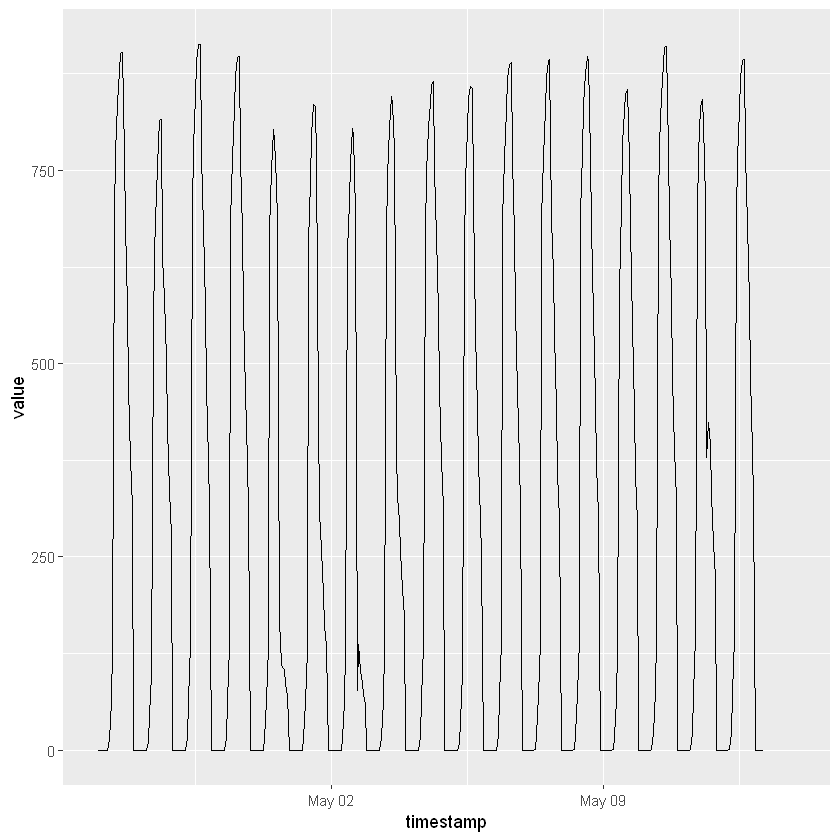

In [96]:
# Removing non-productive hours
datamerge = filter(datamerge, hour>4,hour<21)
tail(datamerge)

dswrf=weatherdata[variable=='DSWRF' & lat==36.5 & lon==33.25]
dswrf[,timestamp:=as.Date(date)+dhours(hour)]
head(dswrf)

ggplot(dswrf[date>'2022-04-25'],aes(x=timestamp,y=value)) + geom_line() + geom_line()

wide_weather=dcast(datamerge,date+hour+production~variable+lat+lon,value.var='value')
tail(wide_weather)

plot_table = dcast(datamerge,date+hour+production+lat+lon~variable,value.var='value')
tail(plot_table)
str(plot_table)

We plotted graphs to understand the relationship between the variables and production.


Although data is scattered, as the cloud amount decreases, production increases as expected.

And as DSWRF increases production increases as well.

For the humidity, we see that there is a negative correlation.

Finally, temperature is positively affecting the production.

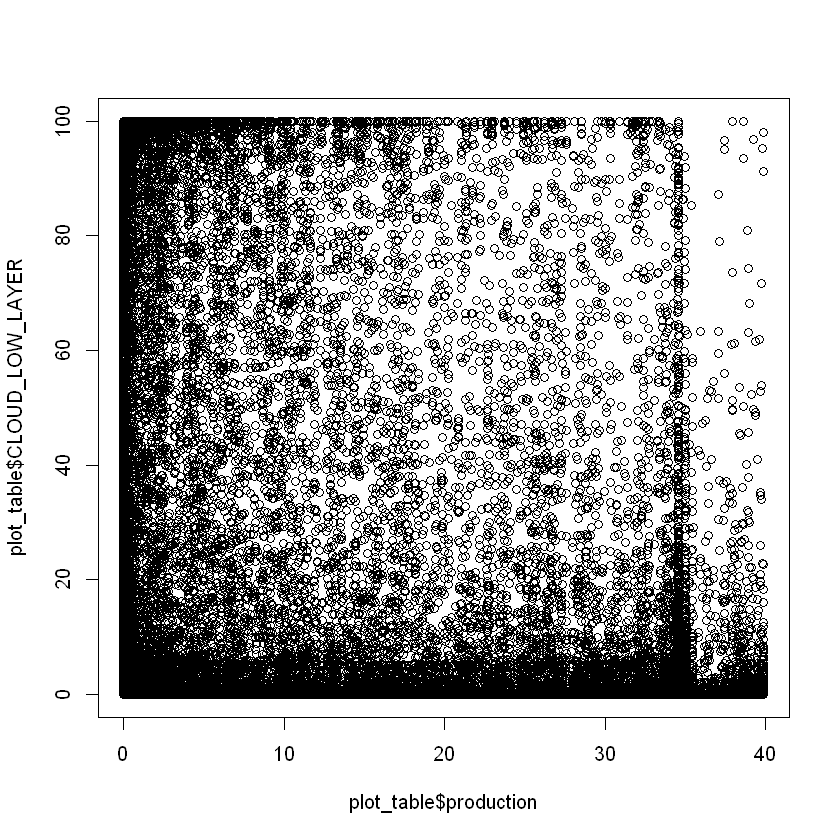

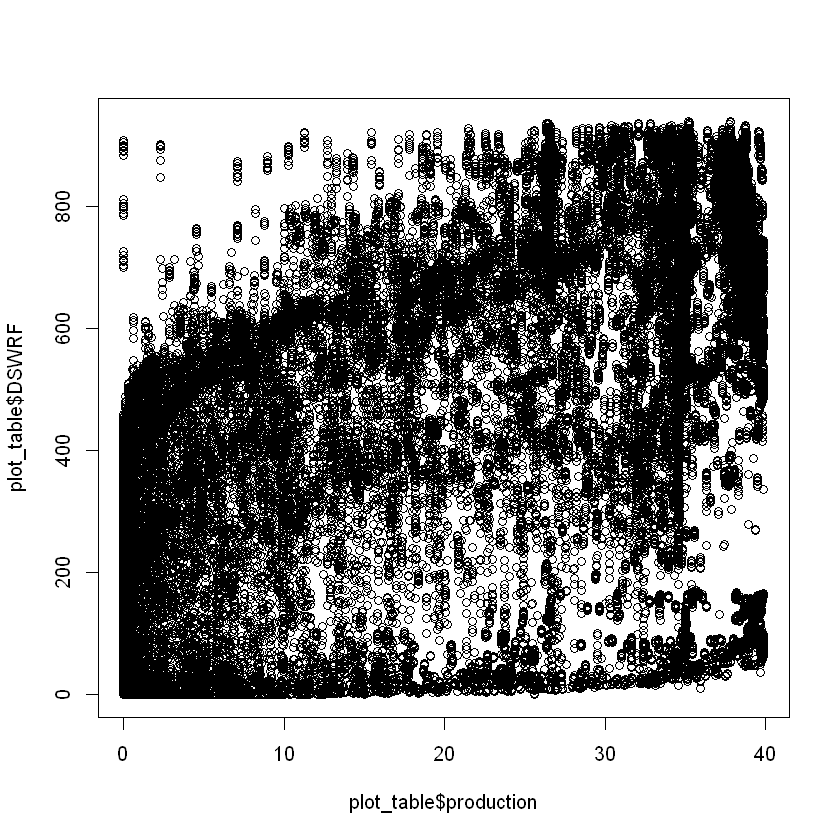

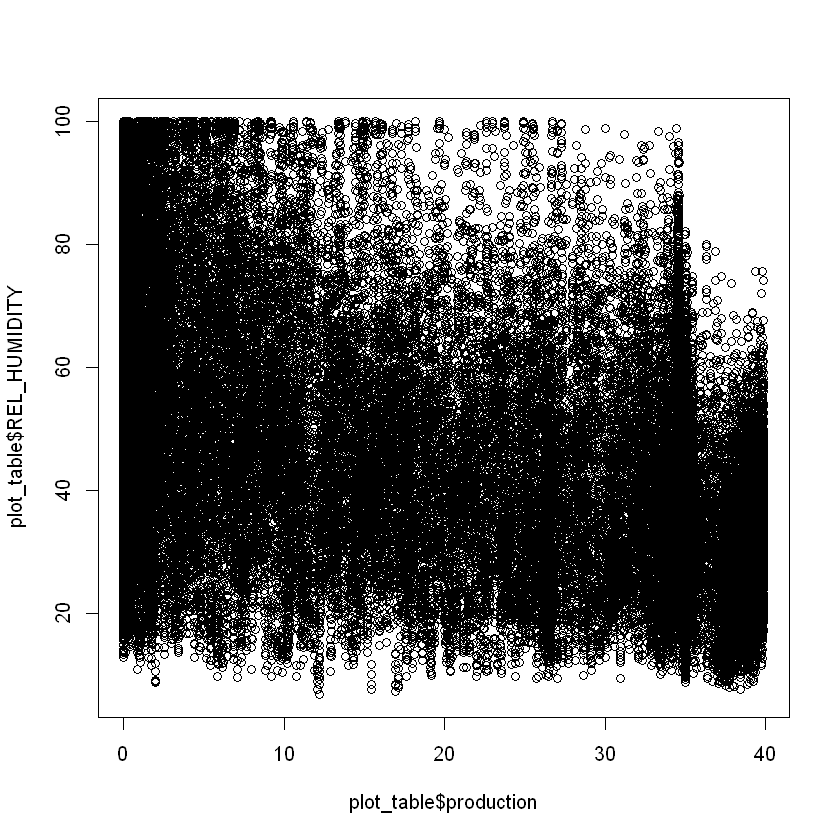

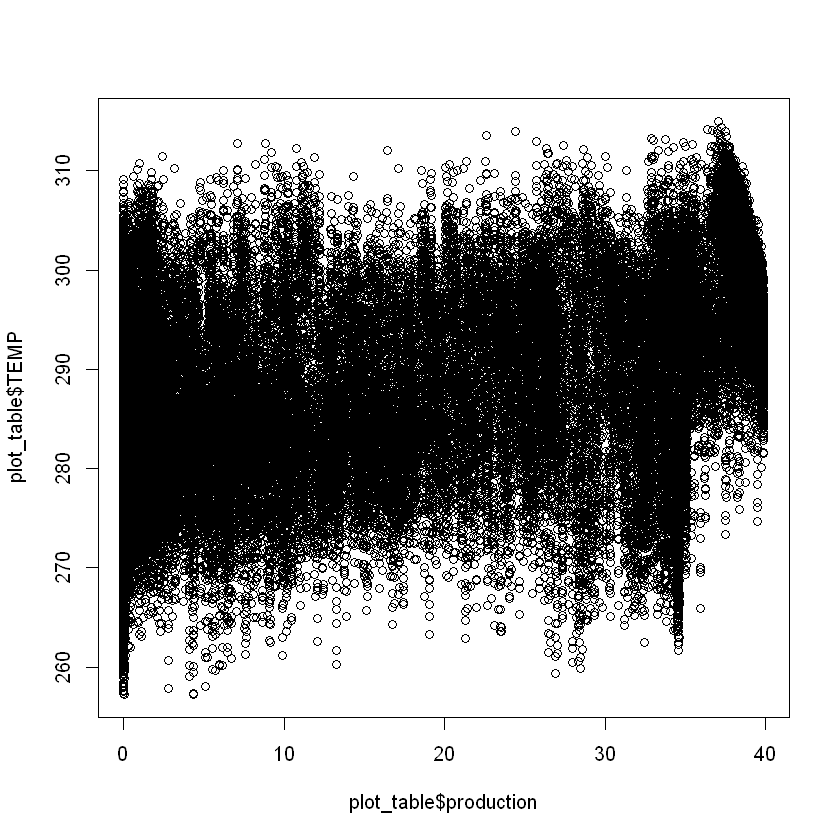

,hour,production,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,CLOUD_LOW_LAYER_36.5_33.5,CLOUD_LOW_LAYER_36.75_33,CLOUD_LOW_LAYER_36.75_33.25,...,REL_HUMIDITY_36.75_33.5,TEMP_36.25_33,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5
hour,1.000000000,-0.09984959,0.0633732,0.06075687,0.02661908,0.1305705,0.1011547,0.02661141,0.09756452,0.04243252,...,-0.1844912,0.1419668,0.1457280,0.1485356,0.2168932,0.2152449,0.2401390,0.1833037,0.2163616,0.1875698
production,-0.099849589,1.00000000,-0.3034940,-0.29788734,-0.26387772,-0.3010794,-0.2954765,-0.26959227,-0.27854205,-0.27907176,...,-0.4677095,0.4973002,0.5013981,0.4902372,0.4560725,0.4515309,0.4601273,0.4402191,0.4418870,0.4426385
CLOUD_LOW_LAYER_36.25_33,0.063373200,-0.30349395,1.0000000,0.91551410,0.83915221,0.7883348,0.7697907,0.74216658,0.72072980,0.74887596,...,0.6165333,-0.4416756,-0.4326317,-0.4229278,-0.4125900,-0.4200672,-0.4070369,-0.4243645,-0.4253308,-0.4134881
CLOUD_LOW_LAYER_36.25_33.25,0.060756874,-0.29788734,0.9155141,1.00000000,0.91920156,0.7754062,0.7976599,0.77975847,0.70300824,0.75395119,...,0.6125145,-0.4245440,-0.4166539,-0.4062106,-0.3910917,-0.4005507,-0.3890341,-0.4012821,-0.4056977,-0.3937492
CLOUD_LOW_LAYER_36.25_33.5,0.026619076,-0.26387772,0.8391522,0.91920156,1.00000000,0.7323469,0.7657497,0.78056767,0.66843136,0.73218235,...,0.5928313,-0.4115043,-0.4046544,-0.3949289,-0.3843747,-0.3931630,-0.3823833,-0.3921978,-0.3984467,-0.3844351
CLOUD_LOW_LAYER_36.5_33,0.130570520,-0.30107937,0.7883348,0.77540621,0.73234691,1.0000000,0.8468852,0.75633066,0.85085835,0.80622542,...,0.5566725,-0.4025997,-0.3918866,-0.3830750,-0.3802310,-0.3821435,-0.3632275,-0.3906205,-0.3839716,-0.3739125
CLOUD_LOW_LAYER_36.5_33.25,0.101154730,-0.29547653,0.7697907,0.79765989,0.76574969,0.8468852,1.0000000,0.88521777,0.76918479,0.83950756,...,0.5404515,-0.3425805,-0.3352660,-0.3272384,-0.3145310,-0.3252775,-0.3136088,-0.3235812,-0.3268227,-0.3124099
CLOUD_LOW_LAYER_36.5_33.5,0.026611412,-0.26959227,0.7421666,0.77975847,0.78056767,0.7563307,0.8852178,1.00000000,0.70104285,0.82712309,...,0.5589576,-0.3525255,-0.3469797,-0.3415107,-0.3315760,-0.3450821,-0.3391767,-0.3375182,-0.3479486,-0.3299036
CLOUD_LOW_LAYER_36.75_33,0.097564518,-0.27854205,0.7207298,0.70300824,0.66843136,0.8508583,0.7691848,0.70104285,1.00000000,0.82849089,...,0.6127300,-0.4824952,-0.4702402,-0.4608304,-0.4591438,-0.4633999,-0.4396586,-0.4794869,-0.4656827,-0.4609397
CLOUD_LOW_LAYER_36.75_33.25,0.042432521,-0.27907176,0.7488760,0.75395119,0.73218235,0.8062254,0.8395076,0.82712309,0.82849089,1.00000000,...,0.6018980,-0.3964037,-0.3883944,-0.3820797,-0.3734076,-0.3818726,-0.3691705,-0.3817998,-0.3862626,-0.3705576


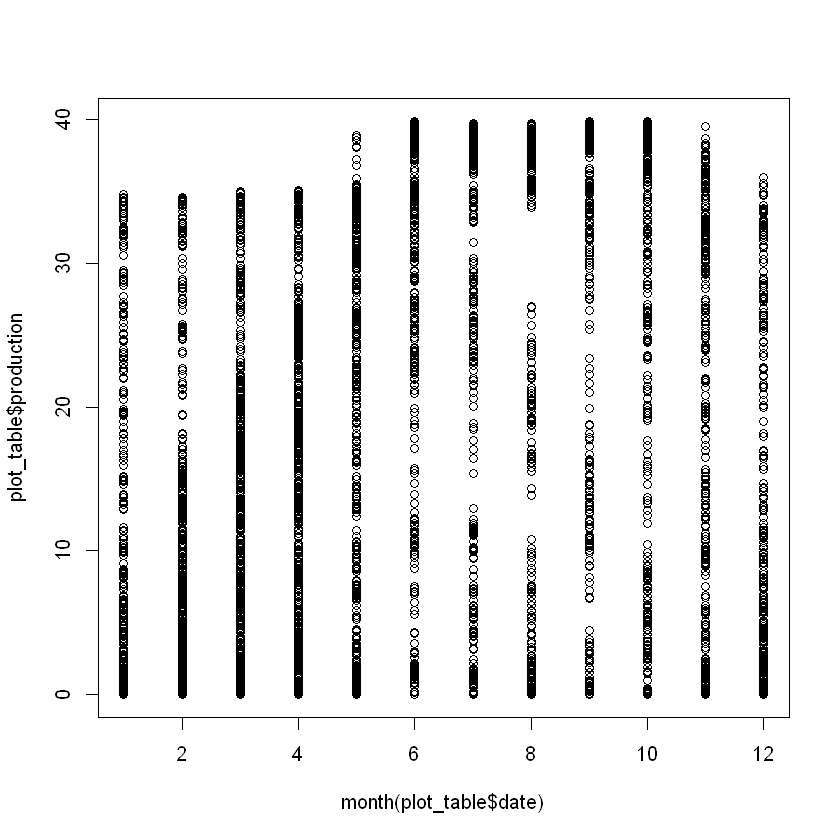

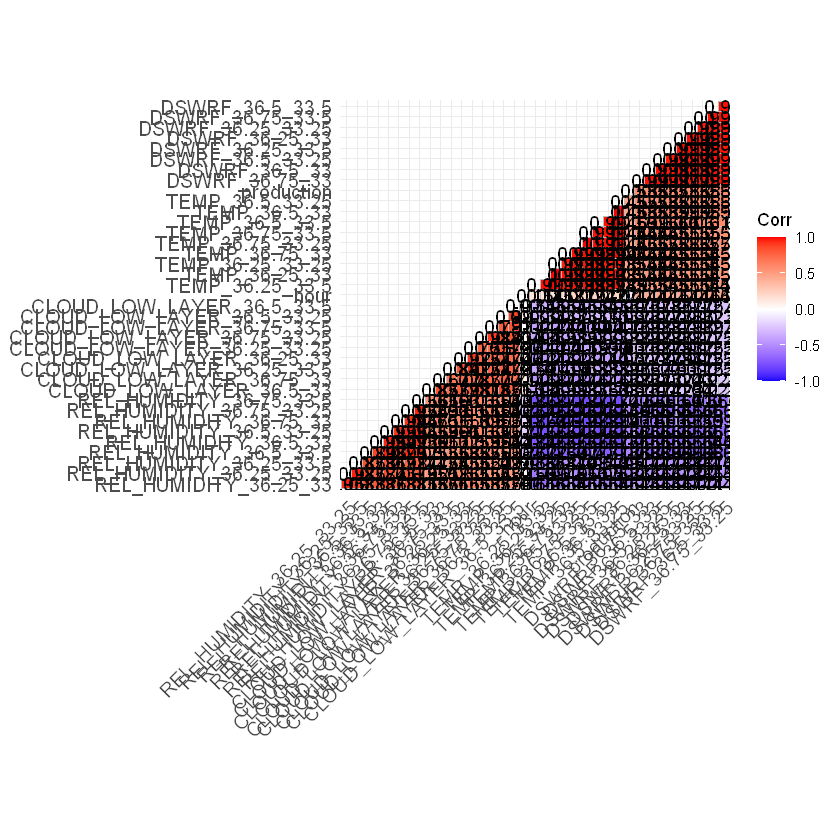

In [6]:
# Plots to see the relationship between variables and production
plot(plot_table$production, plot_table$CLOUD_LOW_LAYER)
plot(plot_table$production, plot_table$DSWRF)
plot(plot_table$production, plot_table$REL_HUMIDITY)
plot(plot_table$production, plot_table$TEMP)

# Seasonality check
plot(month(plot_table$date), plot_table$production)

# Correlation analyses
correl=cor(as.matrix(wide_weather[,2:ncol(wide_weather)]),as.matrix(wide_weather[,2:ncol(wide_weather)]))
correl
ggcorrplot(correl,hc.order = TRUE, type = "lower",lab = TRUE)
# ggpairs(wide_weather[,2:ncol(wide_weather)])

In [97]:
lin_reg = lm(production~., wide_weather)
lin_reg
summary(lin_reg)


Call:
lm(formula = production ~ ., data = wide_weather)

Coefficients:
                (Intercept)                         date  
                 -4.901e+02                    1.959e-02  
                       hour     CLOUD_LOW_LAYER_36.25_33  
                 -1.123e+00                   -8.950e-03  
CLOUD_LOW_LAYER_36.25_33.25   CLOUD_LOW_LAYER_36.25_33.5  
                 -1.447e-02                    2.898e-02  
    CLOUD_LOW_LAYER_36.5_33   CLOUD_LOW_LAYER_36.5_33.25  
                 -2.963e-02                   -2.891e-02  
  CLOUD_LOW_LAYER_36.5_33.5     CLOUD_LOW_LAYER_36.75_33  
                 -1.174e-02                    2.266e-02  
CLOUD_LOW_LAYER_36.75_33.25   CLOUD_LOW_LAYER_36.75_33.5  
                  7.666e-03                    2.179e-02  
             DSWRF_36.25_33            DSWRF_36.25_33.25  
                 -2.331e-04                   -7.032e-03  
           DSWRF_36.25_33.5                DSWRF_36.5_33  
                  5.240e-03                


Call:
lm(formula = production ~ ., data = wide_weather)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.819  -6.455  -0.598   5.731  27.678 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -4.901e+02  1.838e+01 -26.664  < 2e-16 ***
date                         1.959e-02  8.891e-04  22.037  < 2e-16 ***
hour                        -1.123e+00  3.211e-02 -34.958  < 2e-16 ***
CLOUD_LOW_LAYER_36.25_33    -8.950e-03  1.068e-02  -0.838 0.402277    
CLOUD_LOW_LAYER_36.25_33.25 -1.447e-02  1.362e-02  -1.063 0.287849    
CLOUD_LOW_LAYER_36.25_33.5   2.898e-02  1.115e-02   2.600 0.009338 ** 
CLOUD_LOW_LAYER_36.5_33     -2.963e-02  1.009e-02  -2.937 0.003324 ** 
CLOUD_LOW_LAYER_36.5_33.25  -2.891e-02  1.299e-02  -2.225 0.026107 *  
CLOUD_LOW_LAYER_36.5_33.5   -1.174e-02  1.235e-02  -0.951 0.341678    
CLOUD_LOW_LAYER_36.75_33     2.266e-02  8.543e-03   2.652 0.008019 ** 
CLOUD_LOW_LAYER_36.75_33.25  7.666e-03  1.366e-02   0

Same variables for different coordinats are highly correlated as seen in correlation matrice, therefore we unified those variables to one variable by taking average.

In [8]:
# Since same variables are highly correlated in different coordinates, taking average to unify those variables would increase the R squared value.
wide_weather2 = mutate(wide_weather, avg_cloud = ((CLOUD_LOW_LAYER_36.25_33 + CLOUD_LOW_LAYER_36.25_33.25 + CLOUD_LOW_LAYER_36.25_33.5 +CLOUD_LOW_LAYER_36.5_33 
                                          + CLOUD_LOW_LAYER_36.5_33.25 +CLOUD_LOW_LAYER_36.5_33.5 +CLOUD_LOW_LAYER_36.75_33 +CLOUD_LOW_LAYER_36.75_33.25 
                                          + CLOUD_LOW_LAYER_36.75_33.5)/9),
                                        avg_temp = ((TEMP_36.25_33 + TEMP_36.25_33.25 + TEMP_36.25_33.5 + TEMP_36.5_33 + TEMP_36.5_33.25 + TEMP_36.5_33.5 + TEMP_36.75_33
                                          + TEMP_36.75_33.25)/9),
                                        avg_dswrf = ((DSWRF_36.25_33 + DSWRF_36.25_33.25 + DSWRF_36.25_33.5 + DSWRF_36.5_33 + DSWRF_36.5_33.25 + DSWRF_36.5_33.5
                                          + DSWRF_36.75_33 + DSWRF_36.75_33.25 + DSWRF_36.75_33.5)/9),
                                        avg_hum = ((REL_HUMIDITY_36.25_33 + REL_HUMIDITY_36.25_33.25 + REL_HUMIDITY_36.25_33.5 + REL_HUMIDITY_36.5_33 + REL_HUMIDITY_36.5_33.25
                                          + REL_HUMIDITY_36.5_33.5 + REL_HUMIDITY_36.75_33 + REL_HUMIDITY_36.75_33.25 + REL_HUMIDITY_36.75_33.5)/9)) %>% select(date, hour, production,avg_cloud, avg_temp, avg_dswrf, avg_hum)
head(wide_weather2)
skim(wide_weather2)

date,hour,production,avg_cloud,avg_temp,avg_dswrf,avg_hum
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-02-01,5,0.000,53.44444,247.0169,0.000000,86.48889
2021-02-01,6,0.000,59.44444,247.2502,0.000000,85.68889
2021-02-01,7,0.000,65.88889,247.5629,0.000000,85.31111
2021-02-01,8,0.189,68.44444,247.5209,0.000000,86.85556
2021-02-01,9,1.350,70.33333,248.4133,6.444444,85.97778
2021-02-01,10,1.730,67.33333,249.3682,147.777778,81.52222


,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Date,date,0,1,2021-02-01,2022-05-06,2021-09-19,454,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,hour,0,1,NA,NA,NA,NA,12.50000,4.610090,5.00000,8.75000,12.5000000,16.25000,20.00000,<U+2587><U+2586><U+2586><U+2586><U+2586>
3,numeric,production,0,1,NA,NA,NA,NA,15.66507,14.934421,0.00000,0.24975,11.3645000,32.09900,39.88000,<U+2587><U+2582><U+2582><U+2582><U+2585>
4,numeric,avg_cloud,0,1,NA,NA,NA,NA,14.91836,26.802522,0.00000,0.00000,0.2777778,16.78056,100.00000,<U+2587><U+2581><U+2581><U+2581><U+2581>
5,numeric,avg_temp,0,1,NA,NA,NA,NA,255.66167,8.377785,235.52756,249.03522,255.1405556,262.31989,274.64756,<U+2582><U+2587><U+2587><U+2587><U+2583>
6,numeric,avg_dswrf,0,1,NA,NA,NA,NA,341.61505,294.662574,0.00000,30.22489,318.7988889,598.56644,929.28178,<U+2587><U+2583><U+2583><U+2583><U+2582>
7,numeric,avg_hum,0,1,NA,NA,NA,NA,49.46398,20.676258,12.66667,32.83333,46.5000000,64.25833,99.61111,<U+2585><U+2587><U+2586><U+2583><U+2582>


-- Data Summary ------------------------
                           Values                
Name                       wide_weather2         
Number of rows             7264                  
Number of columns          7                     
Key                        date, hour, production
_______________________                          
Column type frequency:                           
  Date                     1                     
  numeric                  6                     
________________________                         
Group variables            None                  

-- Variable type: Date ---------------------------------------------------------
  skim_variable n_missing complete_rate min        max        median    
1 date                  0             1 2021-02-01 2022-05-06 2021-09-19
  n_unique
1      454

-- Variable type: numeric ------------------------------------------------------
  skim_variable n_missing complete_rate  mean     sd    p0     p25     p50   

We created lagged variables for time forecasting. We choose 1 day and 1 week lags.

In [9]:
# Creating lagged variables for time forecasting. 1 day lag and 1 week lag is obtained.
wide_weather2 <- mutate(wide_weather2,
          production_lag1 = lag(production, 16, default = mean(wide_weather2$production)),
         avg_cloud_lag1 = lag(avg_cloud, 16, default = mean(wide_weather2$avg_cloud)),
         avg_temp_lag1 = lag(avg_temp, 16, default = mean(wide_weather2$avg_temp)),
         avg_dswrf_lag1 = lag(avg_dswrf, 16, default = mean(wide_weather2$avg_dswrf)),
         avg_hum_lag1 = lag(avg_hum, 16, default = mean(wide_weather2$avg_hum)),
         production_lag7 = lag(production, 112, default = mean(wide_weather2$production)),
         avg_cloud_lag7 = lag(avg_cloud, 112,default = mean(wide_weather2$avg_cloud)),
         avg_temp_lag7 = lag(avg_temp, 112, default = mean(wide_weather2$avg_temp)),
         avg_dswrf_lag7 = lag(avg_dswrf, 112, default = mean(wide_weather2$avg_dswrf))) %>%filter(date >= as_date('2021-02-02'))

head(wide_weather2, 18)

date,hour,production,avg_cloud,avg_temp,avg_dswrf,avg_hum,production_lag1,avg_cloud_lag1,avg_temp_lag1,avg_dswrf_lag1,avg_hum_lag1,production_lag7,avg_cloud_lag7,avg_temp_lag7,avg_dswrf_lag7
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-02-02,5,0.00,0.000000,246.3193,0.0000,71.24444,0.000,53.44444,247.0169,0.000000,86.48889,15.66507,14.91836,255.6617,341.6151
2021-02-02,6,0.00,0.000000,246.3207,0.0000,70.51111,0.000,59.44444,247.2502,0.000000,85.68889,15.66507,14.91836,255.6617,341.6151
2021-02-02,7,0.00,0.000000,246.3756,0.0000,69.23333,0.000,65.88889,247.5629,0.000000,85.31111,15.66507,14.91836,255.6617,341.6151
2021-02-02,8,1.16,0.000000,246.5256,0.0000,68.12222,0.189,68.44444,247.5209,0.000000,86.85556,15.66507,14.91836,255.6617,341.6151
2021-02-02,9,5.04,0.000000,248.3711,10.0000,65.34444,1.350,70.33333,248.4133,6.444444,85.97778,15.66507,14.91836,255.6617,341.6151
2021-02-02,10,6.77,0.000000,250.3136,188.8889,59.01111,1.730,67.33333,249.3682,147.777778,81.52222,15.66507,14.91836,255.6617,341.6151
2021-02-02,11,7.11,0.000000,251.3338,257.7778,56.11111,2.730,68.66667,249.9880,203.333333,79.65556,15.66507,14.91836,255.6617,341.6151
2021-02-02,12,7.87,0.000000,252.2002,321.1111,54.48889,1.950,71.11111,250.3578,243.333333,78.55556,15.66507,14.91836,255.6617,341.6151
2021-02-02,13,6.45,0.000000,252.8542,364.4444,53.74444,1.350,74.00000,250.5882,262.222222,77.53333,15.66507,14.91836,255.6617,341.6151


In [10]:
# Split train and test data
train_weather <- wide_weather2[ which(wide_weather2$date<as.Date('2022-03-01'))]
test_weather <- wide_weather2[ which(wide_weather2$date>=as.Date('2022-03-01'))]

head(train_weather)

date,hour,production,avg_cloud,avg_temp,avg_dswrf,avg_hum,production_lag1,avg_cloud_lag1,avg_temp_lag1,avg_dswrf_lag1,avg_hum_lag1,production_lag7,avg_cloud_lag7,avg_temp_lag7,avg_dswrf_lag7
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-02-02,5,0.00,0,246.3193,0.0000,71.24444,0.000,53.44444,247.0169,0.000000,86.48889,15.66507,14.91836,255.6617,341.6151
2021-02-02,6,0.00,0,246.3207,0.0000,70.51111,0.000,59.44444,247.2502,0.000000,85.68889,15.66507,14.91836,255.6617,341.6151
2021-02-02,7,0.00,0,246.3756,0.0000,69.23333,0.000,65.88889,247.5629,0.000000,85.31111,15.66507,14.91836,255.6617,341.6151
2021-02-02,8,1.16,0,246.5256,0.0000,68.12222,0.189,68.44444,247.5209,0.000000,86.85556,15.66507,14.91836,255.6617,341.6151
2021-02-02,9,5.04,0,248.3711,10.0000,65.34444,1.350,70.33333,248.4133,6.444444,85.97778,15.66507,14.91836,255.6617,341.6151
2021-02-02,10,6.77,0,250.3136,188.8889,59.01111,1.730,67.33333,249.3682,147.777778,81.52222,15.66507,14.91836,255.6617,341.6151


Since production differs hourly, we modeled our prediction on hourly basis.

In [11]:
# Splitting the data hourly to have a different model for every hour
train_hour05 <- train_weather[ which(train_weather$hour==5),]
train_hour06 <- train_weather[ which(train_weather$hour==6),]
train_hour07 <- train_weather[ which(train_weather$hour==7),]
train_hour08 <- train_weather[ which(train_weather$hour==8),]
train_hour09 <- train_weather[ which(train_weather$hour==9),]
train_hour10 <- train_weather[ which(train_weather$hour==10),]
train_hour11 <- train_weather[ which(train_weather$hour==11),]
train_hour12 <- train_weather[ which(train_weather$hour==12),]
train_hour13 <- train_weather[ which(train_weather$hour==13),]
train_hour14 <- train_weather[ which(train_weather$hour==14),]
train_hour15 <- train_weather[ which(train_weather$hour==15),]
train_hour16 <- train_weather[ which(train_weather$hour==16),]
train_hour17 <- train_weather[ which(train_weather$hour==17),]
train_hour18 <- train_weather[ which(train_weather$hour==18),]
train_hour19 <- train_weather[ which(train_weather$hour==19),]
train_hour20 <- train_weather[ which(train_weather$hour==20),]

test_hour05 <- test_weather[ which(test_weather$hour==5),]
test_hour06 <- test_weather[ which(test_weather$hour==6),]
test_hour07 <- test_weather[ which(test_weather$hour==7),]
test_hour08 <- test_weather[ which(test_weather$hour==8),]
test_hour09 <- test_weather[ which(test_weather$hour==9),]
test_hour10 <- test_weather[ which(test_weather$hour==10),]
test_hour11 <- test_weather[ which(test_weather$hour==11),]
test_hour12 <- test_weather[ which(test_weather$hour==12),]
test_hour13 <- test_weather[ which(test_weather$hour==13),]
test_hour14 <- test_weather[ which(test_weather$hour==14),]
test_hour15 <- test_weather[ which(test_weather$hour==15),]
test_hour16 <- test_weather[ which(test_weather$hour==16),]
test_hour17 <- test_weather[ which(test_weather$hour==17),]
test_hour18 <- test_weather[ which(test_weather$hour==18),]
test_hour19 <- test_weather[ which(test_weather$hour==19),]
test_hour20 <- test_weather[ which(test_weather$hour==20),]

We found the maximum mean production to use in tuning. Maximum production occured at 12 AM with 27.59931.

In [12]:
# Get largest mean production level based on hour
meanProductions <- data.frame(c(mean(train_hour05$production),
                                mean(train_hour06$production),
                                mean(train_hour07$production),
                                mean(train_hour08$production),
                                mean(train_hour09$production),
                                mean(train_hour10$production),
                                mean(train_hour11$production),
                                mean(train_hour12$production),
                                mean(train_hour13$production),
                                mean(train_hour14$production),
                                mean(train_hour15$production),
                                mean(train_hour16$production),
                                mean(train_hour17$production),
                                mean(train_hour18$production),
                                mean(train_hour19$production),
                                mean(train_hour20$production)))

maxMeanProd <- max(meanProductions)
maxMeanProd

meanProductions

# Maximum mean production occurs at 12AM with 27.59931.

[1] 27.59931

c.mean.train_hour05.production...mean.train_hour06.production...
<dbl>
0.029367676
1.040684409
8.329386655
19.290488764
25.416009697
27.278772824
27.569785225
27.599313337
27.040462394


In [13]:
# Creating 12AM model to obtain tuning parameters for all hours
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 5)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 347, 348, 346, 347, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.03190291   7.033515  0.6109335  5.085975
  0.04647669   7.230400  0.5858935  5.507410
  0.06052008   7.669120  0.5353741  5.986251
  0.08116765   8.103883  0.4824946  6.380896
  0.48768904  10.050016  0.3864429  8.399932

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.03190291.

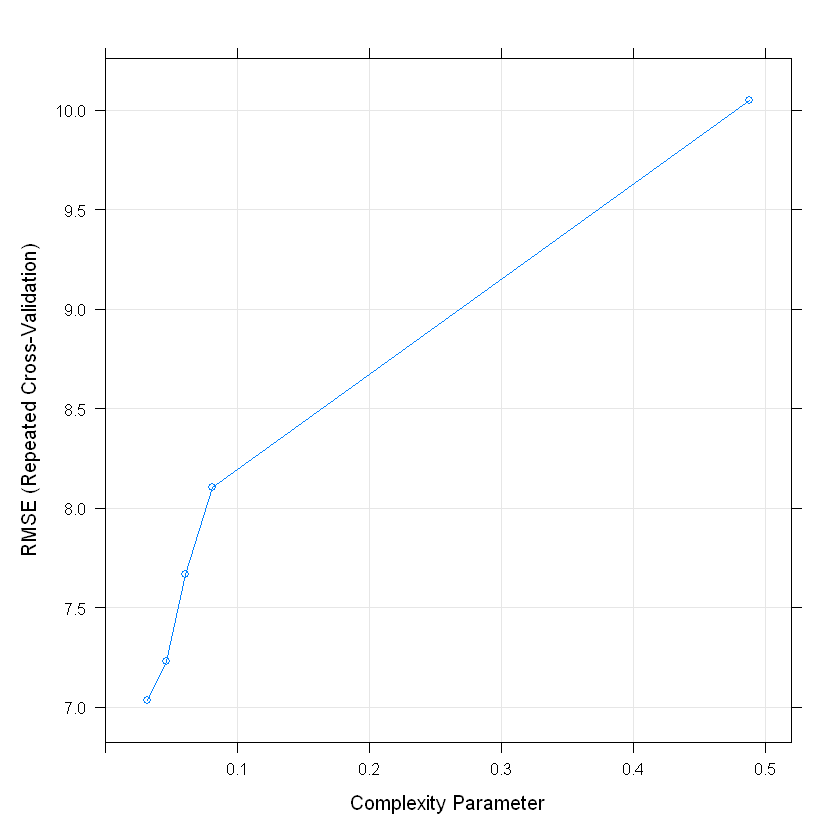

n= 386 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 386 47851.580 27.59931  
   2) avg_temp_lag7< 258.1638 182 18192.960 19.36731  
     4) avg_hum>=71.42778 39  1955.642 10.52146 *
     5) avg_hum< 71.42778 143 12353.320 21.77982  
      10) production_lag1< 23.668 88  6491.083 18.22211 *
      11) production_lag1>=23.668 55  2966.258 27.47215 *
   3) avg_temp_lag7>=258.1638 204  6321.924 34.94355  
     6) production_lag1< 31.168 40  1423.366 28.25792 *
     7) production_lag1>=31.168 164  2674.575 36.57419 *

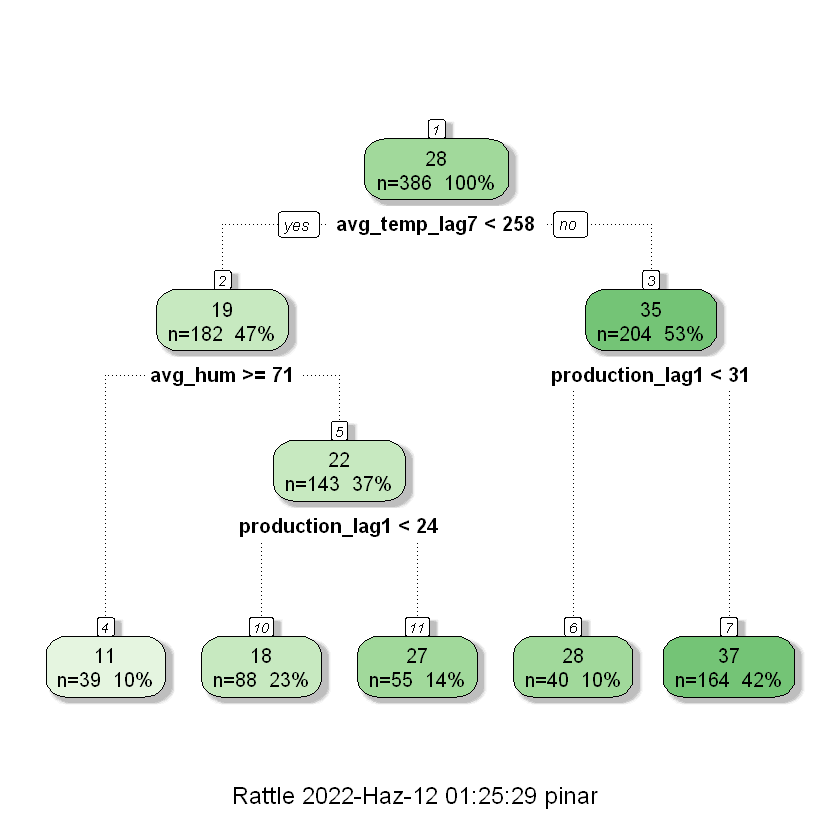

In [14]:
# Decision tree for tuning
hour12_dectree <- train(production~., 
                        train_hour12[,3:ncol(train_hour12)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5)

hour12_dectree
plot(hour12_dectree)

# cp is tuned to  0.03190291 (lowest value).

fancyRpartPlot(hour12_dectree$finalModel)
hour12_dectree$finalModel

In [15]:
# Linear regression for tuning
hour12_linreg <- train(production ~ .,
                   train_hour12[,3:ncol(train_hour12)],
                   method = "lm",
                   trControl = fitControl,
                   tuneLength = 5)

summary(hour12_linreg)
hour12_linreg$finalModel

# Tuning parameter 'intercept' was held constant at a value of TRUE.


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1287  -2.4891   0.4481   2.5515  22.6556 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.036e+01  2.192e+01  -0.929  0.35359    
avg_cloud       -1.091e-01  2.524e-02  -4.323 1.97e-05 ***
avg_temp        -4.887e-01  1.697e-01  -2.880  0.00421 ** 
avg_dswrf        5.168e-03  5.660e-03   0.913  0.36184    
avg_hum         -1.273e-01  4.285e-02  -2.970  0.00317 ** 
production_lag1  4.115e-01  4.669e-02   8.813  < 2e-16 ***
avg_cloud_lag1   5.099e-02  2.694e-02   1.892  0.05922 .  
avg_temp_lag1    3.494e-01  1.716e-01   2.037  0.04240 *  
avg_dswrf_lag1  -2.082e-04  5.938e-03  -0.035  0.97205    
avg_hum_lag1     9.505e-02  4.305e-02   2.208  0.02787 *  
production_lag7  3.230e-01  4.667e-02   6.922 1.96e-11 ***
avg_cloud_lag7   7.343e-02  2.345e-02   3.132  0.00187 ** 
avg_temp_lag7    2.416e-01  8.758e-02   2.758  0.00610 ** 
avg_dswrf


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
    (Intercept)        avg_cloud         avg_temp        avg_dswrf  
     -2.036e+01       -1.091e-01       -4.887e-01        5.168e-03  
        avg_hum  production_lag1   avg_cloud_lag1    avg_temp_lag1  
     -1.273e-01        4.115e-01        5.099e-02        3.494e-01  
 avg_dswrf_lag1     avg_hum_lag1  production_lag7   avg_cloud_lag7  
     -2.082e-04        9.505e-02        3.230e-01        7.343e-02  
  avg_temp_lag7   avg_dswrf_lag7  
      2.416e-01       -5.626e-04  


Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 348, 349, 347, 346, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   2    5.711796  0.7419809  4.078076
   4    5.626096  0.7464941  3.906542
   7    5.628151  0.7457428  3.838230
  10    5.648502  0.7430189  3.829836
  13    5.677964  0.7398427  3.826646

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 4.

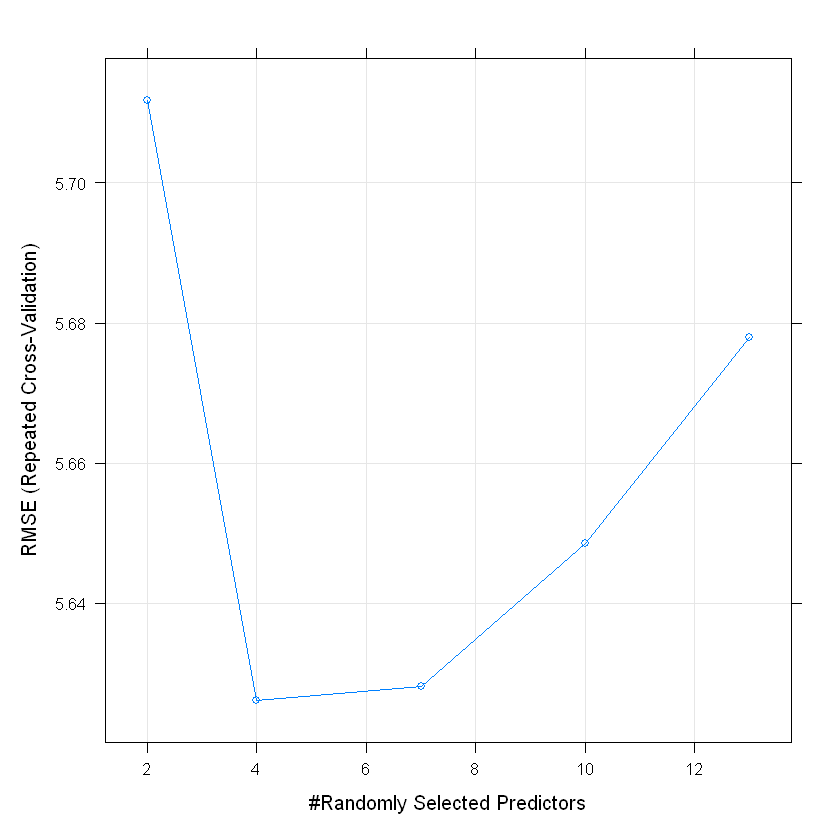

In [16]:
# Random forest for tuning
hour12_ranfor <- train(production~.,
                       train_hour12[,3:ncol(train_hour12)],
                       method = "rf",
                       trControl = fitControl,
                       tuneLength = 5)

hour12_ranfor
plot(hour12_ranfor)

# mtry tuned to 4 according to RMSE.

In [17]:
# GLM does not have a tuning parameter.
hour12_glm <- train(production~.,
                  method = "glm",
                  train_hour12[,3:ncol(train_hour12)],
                  trControl = fitControl,
                  tuneLength = 5)

hour12_glm
summary(hour12_glm)
plot(hour12_glm)

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 350, 347, 346, 347, 347, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  5.99953  0.7168199  4.166168



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-24.1287   -2.4891    0.4481    2.5515   22.6556  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.036e+01  2.192e+01  -0.929  0.35359    
avg_cloud       -1.091e-01  2.524e-02  -4.323 1.97e-05 ***
avg_temp        -4.887e-01  1.697e-01  -2.880  0.00421 ** 
avg_dswrf        5.168e-03  5.660e-03   0.913  0.36184    
avg_hum         -1.273e-01  4.285e-02  -2.970  0.00317 ** 
production_lag1  4.115e-01  4.669e-02   8.813  < 2e-16 ***
avg_cloud_lag1   5.099e-02  2.694e-02   1.892  0.05922 .  
avg_temp_lag1    3.494e-01  1.716e-01   2.037  0.04240 *  
avg_dswrf_lag1  -2.082e-04  5.938e-03  -0.035  0.97205    
avg_hum_lag1     9.505e-02  4.305e-02   2.208  0.02787 *  
production_lag7  3.230e-01  4.667e-02   6.922 1.96e-11 ***
avg_cloud_lag7   7.343e-02  2.345e-02   3.132  0.00187 ** 
avg_temp_lag7    2.416e-01  8.758e-02   2.758  0.00610 ** 
avg_dswrf_lag7  -5.626e

ERROR: Error in plot.train(hour12_glm): There are no tuning parameters for this model.


We prepared models for every hour with tuned parameters to obtain hourly models.

### Hour 05

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 348, 347, 347, 347, ... 
Resampling results across tuning parameters:

  cp           RMSE        Rsquared   MAE        
  0.004181896  0.02008712  0.9057890  0.007682581
  0.007681206  0.02002223  0.9058991  0.007655803
  0.034276181  0.02362337  0.8633006  0.010257386
  0.034424085  0.02366399  0.8625714  0.010337404
  0.852308793  0.04884082  0.7891050  0.032867367

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.007681206.

logical(0)

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 348, 347, 348, 348, ... 
Resampling results:

  RMSE        Rsquared   MAE        
  0.01795025  0.9233769  0.007624028

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 348, 347, 348, 347, ... 
Resampling results:

  RMSE        Rsquared   MAE        
  0.01760236  0.9281936  0.007967721

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 347, 347, 347, 348, ... 
Resampling results:

  RMSE        Rsquared   MAE        
  0.01785647  0.9217128  0.007619624



Call:
NULL

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.094828  -0.001938  -0.001056  -0.000056   0.140398  

Coefficients: (2 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.030e-02  6.490e-02   0.313    0.755    
avg_cloud       -1.112e-06  5.073e-05  -0.022    0.983    
avg_temp        -3.433e-04  5.342e-04  -0.643    0.521    
avg_dswrf               NA         NA      NA       NA    
avg_hum         -4.177e-05  9.504e-05  -0.439    0.661    
production_lag1  7.773e-01  4.005e-02  19.411  < 2e-16 ***
avg_cloud_lag1  -3.022e-05  5.283e-05  -0.572    0.568    
avg_temp_lag1    2.101e-04  5.370e-04   0.391    0.696    
avg_dswrf_lag1          NA         NA      NA       NA    
avg_hum_lag1     4.603e-05  9.403e-05   0.489    0.625    
production_lag7  1.900e-01  4.107e-02   4.626 5.16e-06 ***
avg_cloud_lag7  -1.640e-05  4.135e-05  -0.397    0.692    
avg_temp_lag7    5.788e-05  2.8


Call:
resamples.default(x = list(Ranfor = hour05_ranfor, LinReg =
 hour05_linreg, DecTree = hour05_dectree, GLM = hour05_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp05)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
               Min.     1st Qu.      Median        Mean     3rd Qu.       Max.
Ranfor  0.003773272 0.005871736 0.007380105 0.007967721 0.009681857 0.01410598
LinReg  0.002193453 0.005504476 0.007182690 0.007624028 0.009729223 0.01462666
DecTree 0.002836343 0.005525298 0.007130443 0.007655803 0.009746282 0.01672179
GLM     0.001610682 0.005556767 0.007319240 0.007619624 0.009184158 0.01523840
        NA's
Ranfor     0
LinReg     0
DecTree    0
GLM        0

RMSE 
               Min.    1st Qu.     Median       Mean    3rd Qu.       Max. NA's
Ranfor  0.007881674 0.01315592 0.01664643 0.01760236 0.02144480 0.03279578    0
LinReg  0.003659850 0.01189721 0.01813700 0.01795025 0.02300736 0.03173846    0
DecTree 0.009309854 0.01477849 0.01977653 0.02002223 0.02489801 0.03432235    0
GLM     0.001975752 0.01355733 0.01644769 0.01785647 0.02215273 0.03459608    0

Rsquared 
          

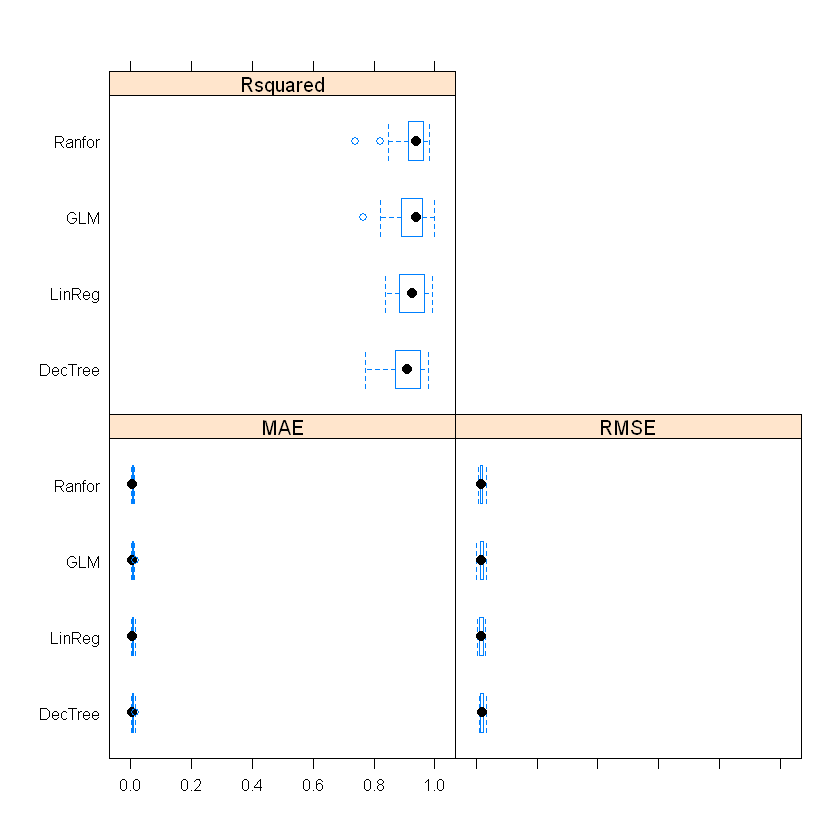

In [50]:
# Decision tree

hour05_dectree <- train(production~., 
                        train_hour05[,3:ncol(train_hour05)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour05_dectree

# Linear regression

options(warn=-1)

hour05_linreg <- train(production ~ .,
                       train_hour05[,3:ncol(train_hour05)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

length(hour05_linreg$coefficients) > hour05_linreg$rank

hour05_linreg

options(warn=1)

# Random forest

hour05_ranfor <- train(production~.,
                       train_hour05[,3:ncol(train_hour05)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour05_ranfor

# GLM
options(warn=-1)

hour05_glm <- train(production~.,
                    method = "glm",
                    train_hour05[,3:ncol(train_hour05)],
                    trControl = fitControl,
                    tuneLength = 5)

hour05_glm
summary(hour05_glm)

options(warn=1)

# Model Comparison

Comp05 <- resamples(list(Ranfor = hour05_ranfor, LinReg=hour05_linreg, DecTree=hour05_dectree, GLM = hour05_glm))
Comp05
summary(Comp05)
bwplot(Comp05)

### Hour 06

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 348, 347, 347, ... 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE      
  0.007095285  0.5926505  0.8808362  0.3220817
  0.015067218  0.6055190  0.8765750  0.3339956
  0.054122009  0.6660496  0.8524311  0.3646931
  0.163466678  0.9275270  0.6962469  0.6412444
  0.680448931  1.4573577  0.5703031  1.0483511

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.007095285.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 347, 347, 348, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4919476  0.9073738  0.2410477

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 347, 347, 347, 347, 347, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4634676  0.9249547  0.2258659

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 347, 348, 347, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4996739  0.9032623  0.2428933



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2914  -0.1066  -0.0140   0.0527   5.6631  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.7437706  2.0171233  -1.360  0.17458    
avg_cloud        0.0006101  0.0014321   0.426  0.67034    
avg_temp         0.0053933  0.0148577   0.363  0.71681    
avg_dswrf       -0.2414596  0.5919806  -0.408  0.68359    
avg_hum         -0.0035435  0.0026850  -1.320  0.18772    
production_lag1  0.8058848  0.0347433  23.195  < 2e-16 ***
avg_cloud_lag1   0.0008162  0.0014869   0.549  0.58341    
avg_temp_lag1    0.0027102  0.0149053   0.182  0.85582    
avg_dswrf_lag1   0.4098420  0.5994851   0.684  0.49462    
avg_hum_lag1     0.0017930  0.0026433   0.678  0.49799    
production_lag7  0.0948768  0.0334473   2.837  0.00481 ** 
avg_cloud_lag7   0.0003804  0.0011536   0.330  0.74177    
avg_temp_lag7    0.0033336  0.0082404   0.405  0.68604    
avg_dswrf_lag7  -0.0044372  0.001


Call:
resamples.default(x = list(Ranfor = hour06_ranfor, LinReg =
 hour06_linreg, DecTree = hour06_dectree, GLM = hour06_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp06)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.1088530 0.1856770 0.2242695 0.2258659 0.2709415 0.3608202    0
LinReg  0.1380874 0.2002041 0.2449289 0.2410477 0.2888155 0.3635592    0
DecTree 0.2160336 0.2775612 0.3121661 0.3220817 0.3670864 0.4435672    0
GLM     0.1551092 0.2045814 0.2398013 0.2428933 0.2670155 0.3675867    0

RMSE 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.1709422 0.3488040 0.4201923 0.4634676 0.5732256 0.8507676    0
LinReg  0.2345355 0.3367136 0.4382205 0.4919476 0.5885003 0.9930588    0
DecTree 0.3561178 0.4869214 0.5531935 0.5926505 0.6534253 1.0527412    0
GLM     0.2408074 0.3604201 0.4608619 0.4996739 0.5516665 1.0408250    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.6923910 0.8918648 0.9499770 0.9249547 0.9657927 0.9927971

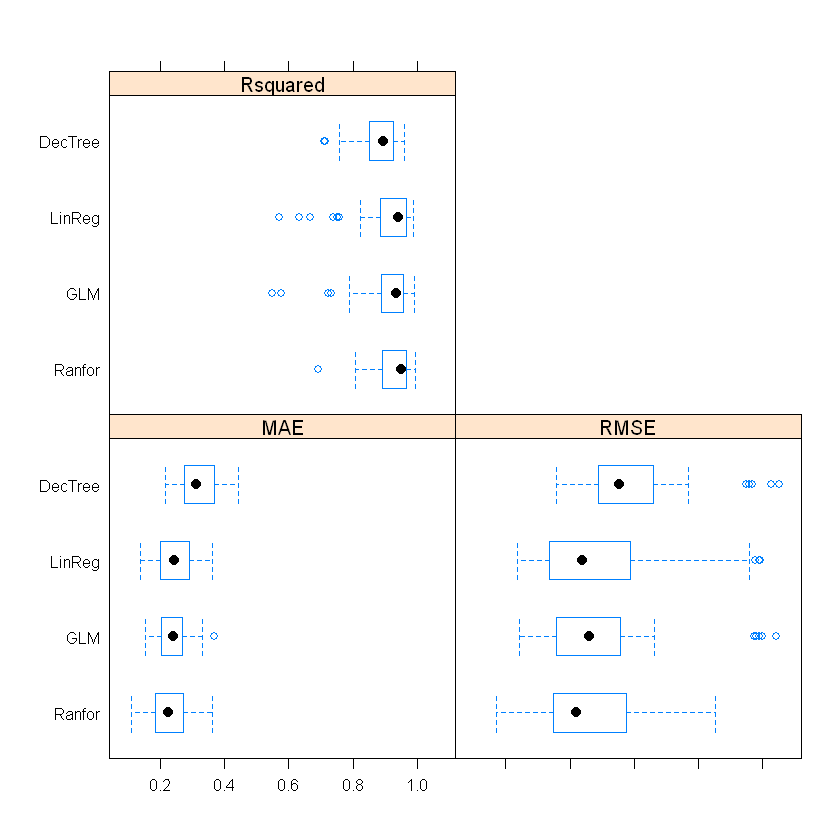

In [51]:
# Decision tree
hour06_dectree <- train(production~., 
                        train_hour06[,3:ncol(train_hour06)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour06_dectree

# Linear regression
hour06_linreg <- train(production~.,
                       train_hour06[,3:ncol(train_hour06)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour06_linreg

# Random forest
hour06_ranfor <- train(production~.,
                       train_hour06[,3:ncol(train_hour06)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour06_ranfor

# GLM
hour06_glm <- train(production~.,
                    method = "glm",
                    train_hour06[,3:ncol(train_hour06)],
                    trControl = fitControl,
                    tuneLength = 5)

hour06_glm
summary(hour06_glm)

# Model Comparison
Comp06 <- resamples(list(Ranfor = hour06_ranfor, LinReg=hour06_linreg, DecTree=hour06_dectree, GLM = hour06_glm))
Comp06
summary(Comp06)
bwplot(Comp06)

### Hour 07

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 348, 348, 347, 346, 347, ... 
Resampling results across tuning parameters:

  cp           RMSE      Rsquared   MAE     
  0.009345307  2.726519  0.9099483  1.854277
  0.009913854  2.790275  0.9060786  1.904507
  0.055970973  3.198304  0.8731643  2.331261
  0.064207306  3.845233  0.8220550  3.033600
  0.797624757  6.958161  0.7736781  5.998577

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.009345307.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 346, 348, 347, 349, 348, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  1.89759  0.9556657  1.141162

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 348, 348, 347, 349, 347, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  1.924931  0.953863  1.128358

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 349, 348, 347, 346, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.905617  0.9548397  1.142414



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.0414  -0.4882  -0.0042   0.5892   9.1038  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -23.947844   9.064733  -2.642  0.00859 ** 
avg_cloud        -0.006168   0.005190  -1.188  0.23543    
avg_temp          0.002220   0.052630   0.042  0.96638    
avg_dswrf         0.716159   0.087071   8.225 3.31e-15 ***
avg_hum          -0.005643   0.010169  -0.555  0.57927    
production_lag1   0.565587   0.043245  13.079  < 2e-16 ***
avg_cloud_lag1    0.011071   0.005326   2.079  0.03835 *  
avg_temp_lag1     0.010043   0.052326   0.192  0.84790    
avg_dswrf_lag1   -0.596370   0.091053  -6.550 1.92e-10 ***
avg_hum_lag1     -0.007294   0.010003  -0.729  0.46634    
production_lag7   0.239358   0.037135   6.446 3.57e-10 ***
avg_cloud_lag7    0.004034   0.004131   0.977  0.32940    
avg_temp_lag7     0.088494   0.030589   2.893  0.00404 ** 
avg_dswrf_lag7   -0.014030   0.00


Call:
resamples.default(x = list(Ranfor = hour07_ranfor, LinReg =
 hour07_linreg, DecTree = hour07_dectree, GLM = hour07_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp07)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
             Min.   1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  0.5145460 0.9957655 1.127431 1.128358 1.278552 1.581925    0
LinReg  0.6948373 0.9713909 1.098828 1.141162 1.269874 1.713602    0
DecTree 1.2711385 1.7109971 1.838712 1.854277 2.028915 2.439211    0
GLM     0.7745571 0.9905190 1.122409 1.142414 1.287188 1.741332    0

RMSE 
             Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  0.8558694 1.611073 1.939949 1.924931 2.220773 2.759635    0
LinReg  1.0985518 1.569447 1.854814 1.897590 2.265526 2.961651    0
DecTree 1.7536093 2.427050 2.719882 2.726519 3.054710 3.524485    0
GLM     1.1181439 1.703803 1.893365 1.905617 2.116748 2.749296    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.8993267 0.9432834 0.9544345 0.9538630 0.9696006 0.9918687    0
LinReg  0.9091900 0.9412110 0.9601929 0

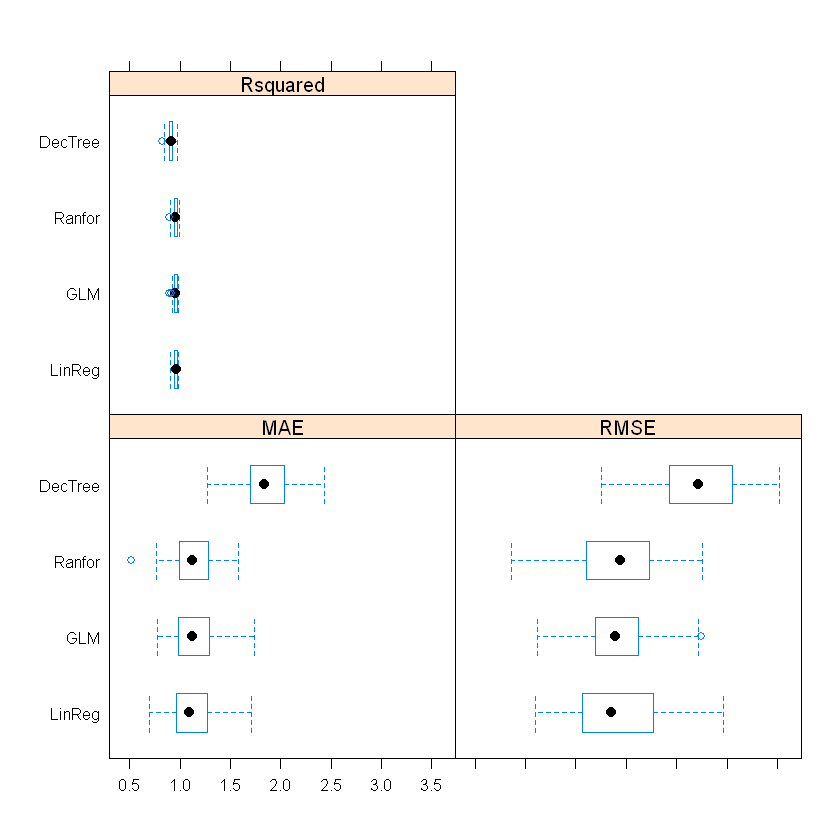

In [72]:
# Decision tree
hour07_dectree <- train(production~., 
                        train_hour07[,3:ncol(train_hour07)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour07_dectree


# Linear regression
hour07_linreg <- train(production~.,
                       train_hour07[,3:ncol(train_hour07)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour07_linreg

# Random forest
hour07_ranfor <- train(production~.,
                       train_hour07[,3:ncol(train_hour07)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour07_ranfor

# GLM
hour07_glm <- train(production~.,
                    method = "glm",
                    train_hour07[,3:ncol(train_hour07)],
                    trControl = fitControl,
                    tuneLength = 5)

hour07_glm
summary(hour07_glm)

# Model Comparison
Comp07 <- resamples(list(Ranfor = hour07_ranfor, LinReg=hour07_linreg, DecTree=hour07_dectree, GLM = hour07_glm))
Comp07
summary(Comp07)
bwplot(Comp07)

### Hour 08

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 347, 348, 346, 348, 347, ... 
Resampling results across tuning parameters:

  cp           RMSE       Rsquared   MAE     
  0.007385004   4.893311  0.8797118  3.613982
  0.017519890   4.996382  0.8750790  3.709255
  0.044656954   5.732730  0.8331886  4.328311
  0.049455776   6.397115  0.7958723  4.976107
  0.790829062  11.293926  0.7124451  9.957344

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.007385004.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 347, 348, 347, 346, 348, ... 
Resampling results:

  RMSE      Rsquared  MAE   
  3.879739  0.925857  2.7051

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 348, 348, 346, 349, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  3.89761  0.9245232  2.703892

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 348, 347, 348, 348, 346, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.899105  0.9255185  2.709714



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-21.7405   -1.3472    0.3225    1.9494   10.4661  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -50.799599  16.802501  -3.023 0.002673 ** 
avg_cloud        -0.050269   0.010869  -4.625 5.18e-06 ***
avg_temp         -0.182105   0.103191  -1.765 0.078428 .  
avg_dswrf         0.350952   0.043423   8.082 9.01e-15 ***
avg_hum          -0.049405   0.021624  -2.285 0.022892 *  
production_lag1   0.578970   0.044260  13.081  < 2e-16 ***
avg_cloud_lag1    0.049121   0.011258   4.363 1.66e-05 ***
avg_temp_lag1     0.171554   0.103431   1.659 0.098035 .  
avg_dswrf_lag1   -0.292683   0.045594  -6.419 4.18e-10 ***
avg_hum_lag1      0.010451   0.021354   0.489 0.624827    
production_lag7   0.184980   0.039644   4.666 4.29e-06 ***
avg_cloud_lag7    0.018933   0.009125   2.075 0.038679 *  
avg_temp_lag7     0.231908   0.058651   3.954 9.20e-05 ***
avg_dswrf_lag7   -0.018


Call:
resamples.default(x = list(Ranfor = hour08_ranfor, LinReg =
 hour08_linreg, DecTree = hour08_dectree, GLM = hour08_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp08)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  1.914578 2.406426 2.637809 2.703892 3.001041 3.563496    0
LinReg  1.549764 2.370148 2.637069 2.705100 3.062325 3.600680    0
DecTree 2.378099 3.081194 3.567155 3.613982 4.053766 5.257397    0
GLM     1.910835 2.413563 2.602250 2.709714 2.981367 3.946823    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.383991 3.466123 3.918560 3.897610 4.334706 5.506467    0
LinReg  2.125138 3.338473 3.684174 3.879739 4.332889 5.688088    0
DecTree 3.281882 4.197636 4.745243 4.893311 5.652971 7.626542    0
GLM     2.440109 3.378018 3.756896 3.899105 4.293973 6.144871    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.8557756 0.9051932 0.9303638 0.9245232 0.9444213 0.9743867    0
LinReg  0.8464663 0.9109100 0.9350402 0.9258570 0.9464

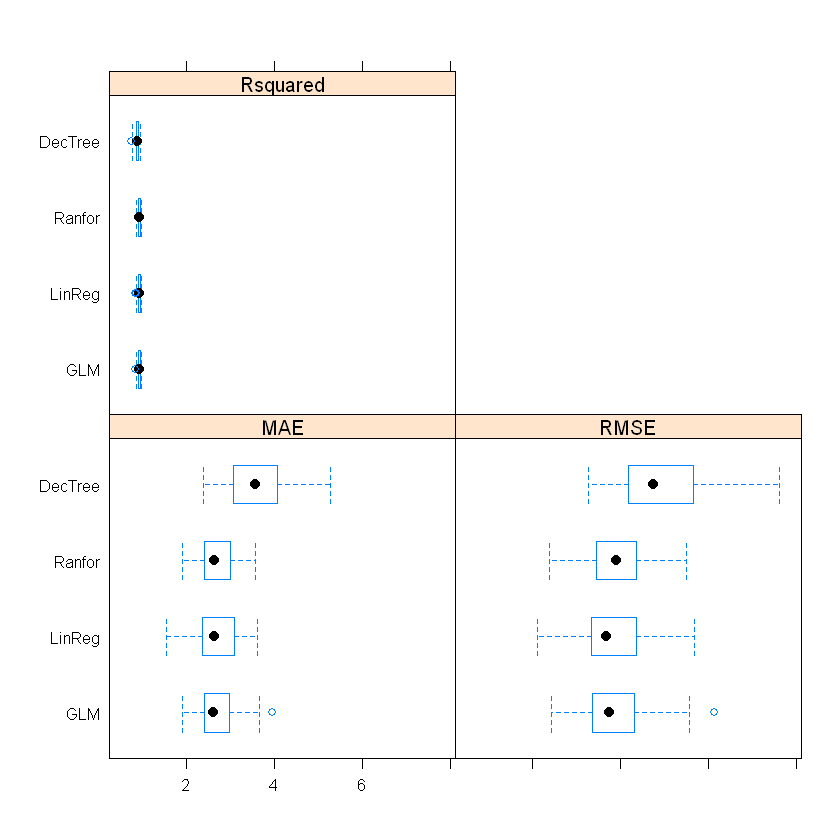

In [52]:
# Decision tree
hour08_dectree <- train(production~., 
                        train_hour08[,3:ncol(train_hour08)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour08_dectree


# Linear regression
hour08_linreg <- train(production~.,
                       train_hour08[,3:ncol(train_hour08)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour08_linreg

# Random forest
hour08_ranfor <- train(production~.,
                       train_hour08[,3:ncol(train_hour08)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour08_ranfor

# GLM
hour08_glm <- train(production~.,
                    method = "glm",
                    train_hour08[,3:ncol(train_hour08)],
                    trControl = fitControl,
                    tuneLength = 5)

hour08_glm
summary(hour08_glm)

# Model Comparison
Comp08 <- resamples(list(Ranfor = hour08_ranfor, LinReg=hour08_linreg, DecTree=hour08_dectree, GLM = hour08_glm))
Comp08
summary(Comp08)
bwplot(Comp08)

### Hour 09

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 347, 346, 348, 348, 347, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.01291037   7.316195  0.7129825  4.993511
  0.02946190   7.227057  0.7193511  5.151733
  0.04439050   7.808570  0.6731496  5.793239
  0.09934497   8.560011  0.6112083  6.562670
  0.59400862  11.886422  0.5147635  9.996914

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0294619.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 347, 348, 347, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.461744  0.7786648  4.543681

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 346, 348, 348, 349, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.174403  0.7963575  4.054322

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 348, 347, 347, 347, 346, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  6.51045  0.7752739  4.559795



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-31.1451   -2.3385    0.5032    3.0918   19.3904  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -60.280905  25.315247  -2.381 0.017758 *  
avg_cloud        -0.138382   0.019033  -7.271 2.13e-12 ***
avg_temp         -0.494127   0.169664  -2.912 0.003803 ** 
avg_dswrf         0.111551   0.033695   3.311 0.001022 ** 
avg_hum          -0.160399   0.037986  -4.223 3.04e-05 ***
production_lag1   0.416579   0.047482   8.773  < 2e-16 ***
avg_cloud_lag1    0.067149   0.020643   3.253 0.001247 ** 
avg_temp_lag1     0.418018   0.169527   2.466 0.014122 *  
avg_dswrf_lag1   -0.074924   0.034406  -2.178 0.030061 *  
avg_hum_lag1      0.084106   0.037605   2.237 0.025906 *  
production_lag7   0.226641   0.045691   4.960 1.07e-06 ***
avg_cloud_lag7    0.066655   0.017328   3.847 0.000141 ***
avg_temp_lag7     0.362432   0.093384   3.881 0.000123 ***
avg_dswrf_lag7   -0.031


Call:
resamples.default(x = list(Ranfor = hour09_ranfor, LinReg =
 hour09_linreg, DecTree = hour09_dectree, GLM = hour09_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp09)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.626303 3.665849 4.053138 4.054322 4.442792 5.144196    0
LinReg  2.929404 4.119036 4.617502 4.543681 5.002727 5.783869    0
DecTree 3.487822 4.539762 5.067204 5.151733 5.738953 7.311668    0
GLM     3.391340 4.214187 4.499825 4.559795 4.967928 5.927747    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Ranfor  4.124326 5.491772 6.119013 6.174403 6.831416  8.657606    0
LinReg  4.091998 5.850587 6.445895 6.461744 7.124915  9.042212    0
DecTree 4.771003 6.427999 7.282183 7.227057 7.932858 10.789750    0
GLM     4.599394 5.809674 6.340217 6.510450 7.270003  8.510097    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.5846976 0.7513070 0.8108520 0.7963575 0.8478979 0.9171496    0
LinReg  0.6067267 0.7364625 0.7821278 0.7786648 0

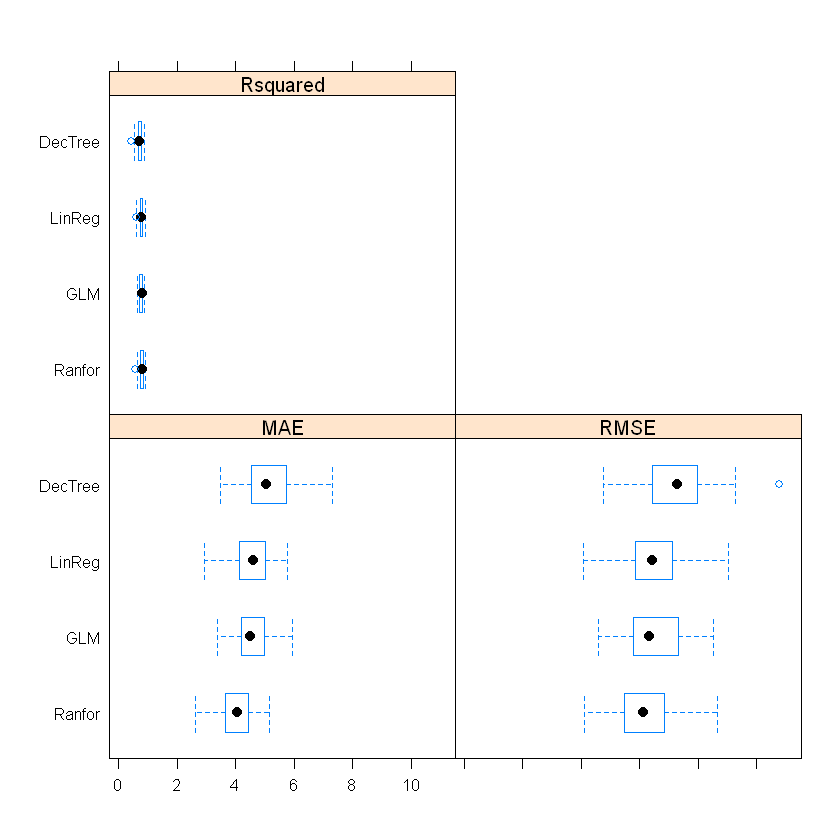

In [53]:
# Decision tree

hour09_dectree <- train(production~., 
                        train_hour09[,3:ncol(train_hour09)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour09_dectree

# Linear regression

hour09_linreg <- train(production~.,
                       train_hour09[,3:ncol(train_hour09)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour09_linreg

# Random forest
hour09_ranfor <- train(production~.,
                       train_hour09[,3:ncol(train_hour09)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour09_ranfor

# GLM
hour09_glm <- train(production~.,
                    method = "glm",
                    train_hour09[,3:ncol(train_hour09)],
                    trControl = fitControl,
                    tuneLength = 5)

hour09_glm
summary(hour09_glm)

# Model Comparison
Comp09 <- resamples(list(Ranfor = hour09_ranfor, LinReg=hour09_linreg, DecTree=hour09_dectree, GLM = hour09_glm))
Comp09
summary(Comp09)
bwplot(Comp09)

### Hour 10

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 346, 347, 349, 347, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.02224023   8.059929  0.6082546  5.438606
  0.03976413   8.107395  0.6014966  5.716642
  0.06678746   8.630039  0.5494976  6.452400
  0.10005041   9.392939  0.4680713  7.118898
  0.48294509  11.311746  0.3786079  9.220870

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.02224023.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 349, 347, 346, 348, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.853879  0.7155733  4.764348

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 348, 348, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  6.439412  0.7486041  4.26761

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 346, 348, 348, 348, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.810889  0.7170234  4.748094



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-27.649   -2.403    0.403    2.989   17.981  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -53.518291  25.577692  -2.092 0.037082 *  
avg_cloud        -0.100914   0.024942  -4.046 6.34e-05 ***
avg_temp         -0.635999   0.181767  -3.499 0.000524 ***
avg_dswrf         0.027235   0.007293   3.735 0.000217 ***
avg_hum          -0.118048   0.044580  -2.648 0.008441 ** 
production_lag1   0.385112   0.044766   8.603  < 2e-16 ***
avg_cloud_lag1    0.036906   0.026425   1.397 0.163350    
avg_temp_lag1     0.646291   0.184524   3.502 0.000517 ***
avg_dswrf_lag1   -0.003196   0.007521  -0.425 0.671097    
avg_hum_lag1      0.111966   0.044507   2.516 0.012301 *  
production_lag7   0.346529   0.046022   7.530 3.89e-13 ***
avg_cloud_lag7    0.060208   0.022031   2.733 0.006578 ** 
avg_temp_lag7     0.223874   0.095799   2.337 0.019973 *  
avg_dswrf_lag7   -0.021357   0.00


Call:
resamples.default(x = list(Ranfor = hour10_ranfor, LinReg =
 hour10_linreg, DecTree = hour10_dectree, GLM = hour10_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp10)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.839777 3.918329 4.279223 4.267610 4.734953 5.541974    0
LinReg  3.380359 4.277265 4.815903 4.764348 5.286279 6.060213    0
DecTree 4.015616 4.864735 5.283434 5.438606 6.003966 8.144955    0
GLM     3.299975 4.292611 4.678205 4.748094 5.101188 6.562769    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Ranfor  4.099653 5.557904 6.597065 6.439412 7.163499  8.948698    0
LinReg  5.092919 6.256812 6.924431 6.853879 7.453654  9.127767    0
DecTree 6.210119 7.251737 7.924344 8.059929 8.464676 12.201983    0
GLM     4.564298 5.829793 6.983586 6.810889 7.488392  8.993127    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.6124228 0.6910267 0.7289637 0.7486041 0.8081379 0.9359811    0
LinReg  0.4589516 0.6750066 0.7319616 0.7155733 0

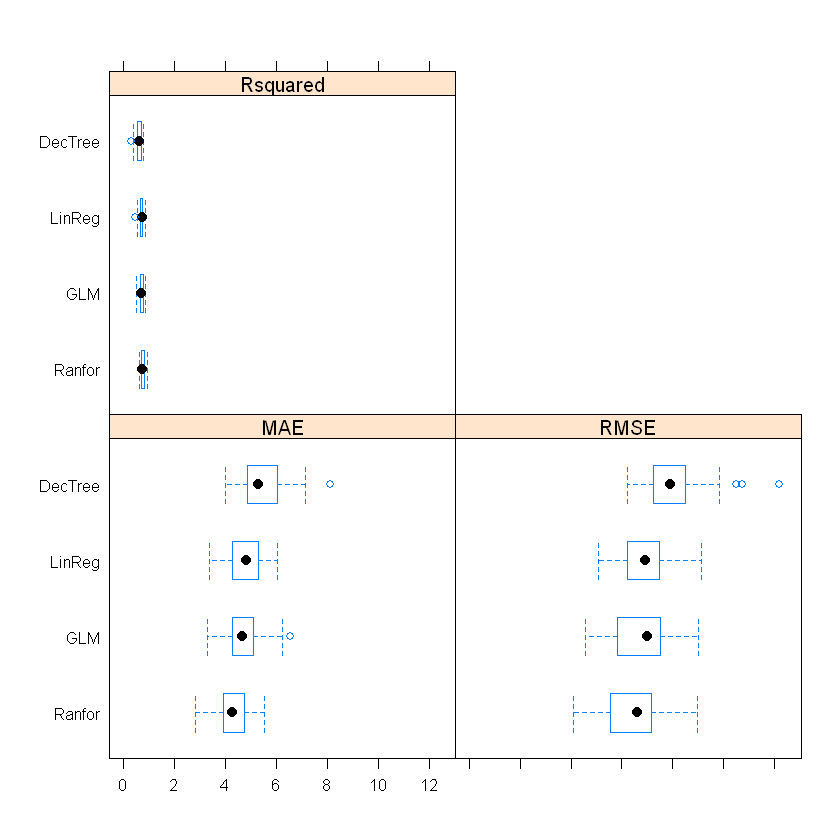

In [77]:
# Decision tree
hour10_dectree <- train(production~., 
                        train_hour10[,3:ncol(train_hour10)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour10_dectree


# Linear regression
hour10_linreg <- train(production~.,
                       train_hour10[,3:ncol(train_hour10)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour10_linreg

# Random forest
hour10_ranfor <- train(production~.,
                       train_hour10[,3:ncol(train_hour10)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour10_ranfor


# GLM
hour10_glm <- train(production~.,
                    method = "glm",
                    train_hour10[,3:ncol(train_hour10)],
                    trControl = fitControl,
                    tuneLength = 5)

hour10_glm
summary(hour10_glm)

# Model Comparison
Comp10 <- resamples( list( Ranfor = hour10_ranfor, LinReg=hour10_linreg, DecTree=hour10_dectree, GLM = hour10_glm))
Comp10
summary(Comp10)
bwplot(Comp10)

### Hour 11

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 347, 348, 349, 346, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.03052807   7.359629  0.6249450  5.245193
  0.03335019   7.456290  0.6148908  5.457501
  0.07502933   7.954688  0.5615036  6.092802
  0.10334431   8.419043  0.5075418  6.538216
  0.49734451  10.581655  0.4175697  8.859297

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.03052807.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 346, 349, 346, 349, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.250701  0.7317588  4.368663

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 346, 348, 346, 349, 348, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  5.78332  0.7680188  3.869928

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 349, 347, 348, 348, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.244732  0.7269504  4.376854



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-23.4888   -2.3498    0.4239    2.8699   17.9244  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -33.671917  23.028086  -1.462  0.14453    
avg_cloud        -0.123188   0.024971  -4.933 1.22e-06 ***
avg_temp         -0.530966   0.170629  -3.112  0.00200 ** 
avg_dswrf         0.012249   0.006151   1.991  0.04717 *  
avg_hum          -0.116421   0.043515  -2.675  0.00779 ** 
production_lag1   0.406587   0.046662   8.714  < 2e-16 ***
avg_cloud_lag1    0.061220   0.026626   2.299  0.02205 *  
avg_temp_lag1     0.496749   0.172361   2.882  0.00418 ** 
avg_dswrf_lag1   -0.002350   0.006396  -0.367  0.71351    
avg_hum_lag1      0.078947   0.043552   1.813  0.07068 .  
production_lag7   0.326242   0.046571   7.005 1.16e-11 ***
avg_cloud_lag7    0.067292   0.022925   2.935  0.00354 ** 
avg_temp_lag7     0.195858   0.089520   2.188  0.02930 *  
avg_dswrf_lag7   -0.007


Call:
resamples.default(x = list(Ranfor = hour11_ranfor, LinReg =
 hour11_linreg, DecTree = hour11_dectree, GLM = hour11_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp11)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.612491 3.449175 3.909407 3.869928 4.215888 5.407799    0
LinReg  2.622988 3.947572 4.304788 4.368663 4.839461 5.885710    0
DecTree 3.380524 4.786091 5.199200 5.245193 5.591453 7.696872    0
GLM     3.226045 3.932157 4.191488 4.376854 5.007652 5.760491    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Ranfor  3.962171 5.271894 5.880195 5.783320 6.354323  8.438658    0
LinReg  4.170655 5.696021 6.235543 6.250701 6.910913  8.240661    0
DecTree 4.722555 6.533577 7.145496 7.359629 7.904644 10.758082    0
GLM     4.276412 5.643170 6.189160 6.244732 7.088149  8.049452    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.4863077 0.7058831 0.7844995 0.7680188 0.8234177 0.9074401    0
LinReg  0.6064506 0.6786076 0.7194698 0.7317588 0

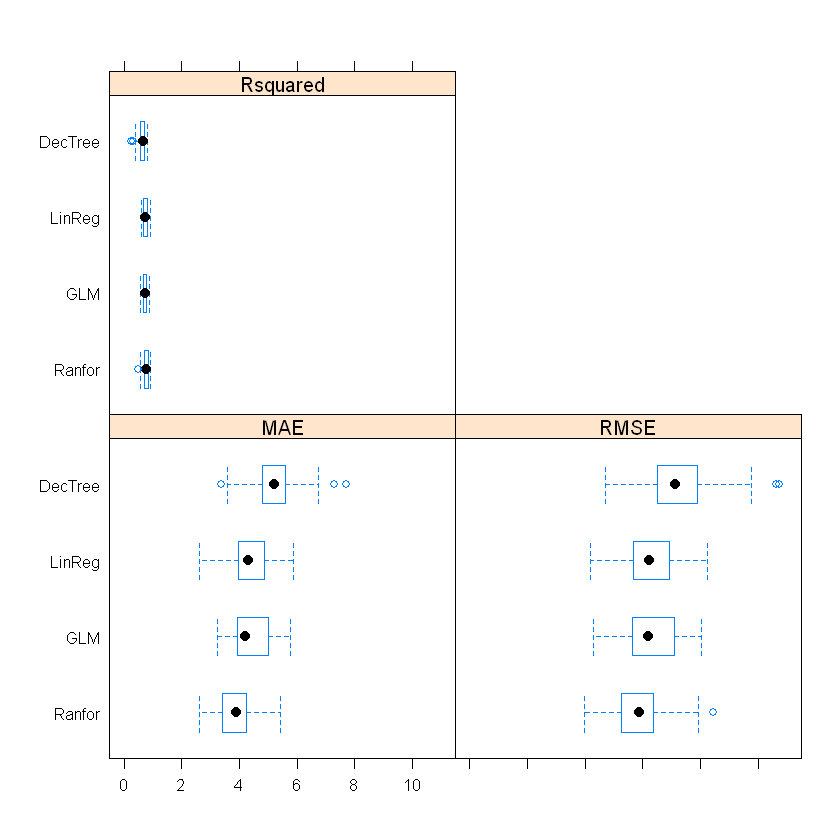

In [54]:
# Decision tree

hour11_dectree <- train(production~., 
                        train_hour11[,3:ncol(train_hour11)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour11_dectree

# Linear regression
hour11_linreg <- train(production~.,
                       train_hour11[,3:ncol(train_hour11)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour11_linreg

# Random Forest
hour11_ranfor <- train(production~.,
                       train_hour11[,3:ncol(train_hour11)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour11_ranfor

# GLM
hour11_glm <- train(production~.,
                    method = "glm",
                    train_hour11[,3:ncol(train_hour11)],
                    trControl = fitControl,
                    tuneLength = 5)

hour11_glm
summary(hour11_glm)

# Model Comparison
Comp11 <- resamples(list(Ranfor = hour11_ranfor, LinReg=hour11_linreg, DecTree=hour11_dectree, GLM = hour11_glm))
Comp11
summary(Comp11)
bwplot(Comp11)

### Hour 12

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 347, 347, 348, 347, 348, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.03190291   7.080918  0.6080690  5.149096
  0.04647669   7.230061  0.5893988  5.462956
  0.06052008   7.703660  0.5353368  6.008772
  0.08116765   8.159628  0.4811064  6.437655
  0.48768904  10.015589  0.3841861  8.339840

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.03190291.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 348, 346, 349, 346, 347, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  6.00609  0.7146209  4.157837

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 349, 349, 346, 348, 348, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5.638695  0.7526627  3.896093

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 349, 347, 348, 348, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5.983008  0.7114813  4.165881



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-24.1287   -2.4891    0.4481    2.5515   22.6556  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.036e+01  2.192e+01  -0.929  0.35359    
avg_cloud       -1.091e-01  2.524e-02  -4.323 1.97e-05 ***
avg_temp        -4.887e-01  1.697e-01  -2.880  0.00421 ** 
avg_dswrf        5.168e-03  5.660e-03   0.913  0.36184    
avg_hum         -1.273e-01  4.285e-02  -2.970  0.00317 ** 
production_lag1  4.115e-01  4.669e-02   8.813  < 2e-16 ***
avg_cloud_lag1   5.099e-02  2.694e-02   1.892  0.05922 .  
avg_temp_lag1    3.494e-01  1.716e-01   2.037  0.04240 *  
avg_dswrf_lag1  -2.082e-04  5.938e-03  -0.035  0.97205    
avg_hum_lag1     9.505e-02  4.305e-02   2.208  0.02787 *  
production_lag7  3.230e-01  4.667e-02   6.922 1.96e-11 ***
avg_cloud_lag7   7.343e-02  2.345e-02   3.132  0.00187 ** 
avg_temp_lag7    2.416e-01  8.758e-02   2.758  0.00610 ** 
avg_dswrf_lag7  -5.626e


Call:
resamples.default(x = list(Ranfor = hour12_ranfor, LinReg =
 hour12_linreg, DecTree = hour12_dectree, GLM = hour12_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp12)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.612838 3.542267 3.791265 3.896093 4.169950 5.650495    0
LinReg  3.276798 3.904053 4.139423 4.157837 4.439267 5.357581    0
DecTree 3.785350 4.726226 5.168244 5.149096 5.571368 6.390833    0
GLM     3.048841 3.693843 4.158895 4.165881 4.571361 5.523608    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  3.889482 4.968156 5.533605 5.638695 6.163831 8.309197    0
LinReg  4.521420 5.392827 5.981090 6.006090 6.542640 7.821729    0
DecTree 4.619121 6.583923 6.990950 7.080918 7.546684 8.704547    0
GLM     3.849556 5.216452 5.930337 5.983008 6.620649 8.789222    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.5519176 0.7085623 0.7465313 0.7526627 0.8064734 0.8780869    0
LinReg  0.5185182 0.6526233 0.7346086 0.7146209 0.7870

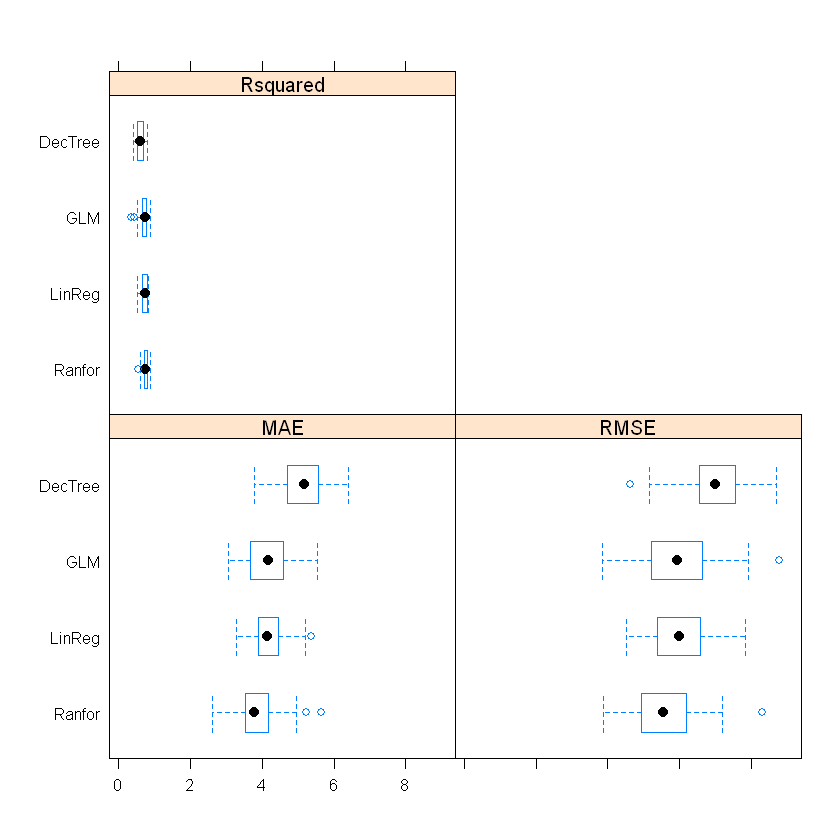

In [55]:
# Decision tree
hour12_dectree <- train(production~., 
                        train_hour12[,3:ncol(train_hour12)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour12_dectree

# Linear regression
hour12_linreg <- train(production~.,
                       train_hour12[,3:ncol(train_hour12)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour12_linreg

# Random forest
hour12_ranfor <- train(production~.,
                       train_hour12[,3:ncol(train_hour12)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour12_ranfor

# GLM
hour12_glm <- train(production~.,
                    method = "glm",
                    train_hour12[,3:ncol(train_hour12)],
                    trControl = fitControl,
                    tuneLength = 5)

hour12_glm
summary(hour12_glm)

# Model Comparison
Comp12 <- resamples(list(Ranfor = hour12_ranfor, LinReg=hour12_linreg, DecTree=hour12_dectree, GLM = hour12_glm))
Comp12
summary(Comp12)
bwplot(Comp12)

### Hour 13

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 348, 349, 349, 347, 348, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.03123082  7.335636  0.5929355  5.439741
  0.03431741  7.391733  0.5860776  5.530379
  0.04263467  7.585598  0.5643756  5.872721
  0.08029135  8.149826  0.4971918  6.475409
  0.49061977  9.997625  0.4302339  8.368436

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.03123082.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 348, 346, 346, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  6.147549  0.7088048  4.44254

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 349, 347, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5.863987  0.7368228  4.249692

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 349, 348, 347, 348, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  6.139704  0.7109338  4.43767



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-19.7928   -2.8939    0.4012    2.7631   20.9776  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.584e+01  2.226e+01  -1.161 0.246478    
avg_cloud       -1.107e-01  2.674e-02  -4.139 4.32e-05 ***
avg_temp        -4.980e-01  1.790e-01  -2.783 0.005668 ** 
avg_dswrf       -5.111e-04  5.572e-03  -0.092 0.926964    
avg_hum         -1.523e-01  4.453e-02  -3.421 0.000694 ***
production_lag1  4.689e-01  4.541e-02  10.326  < 2e-16 ***
avg_cloud_lag1   3.926e-02  2.852e-02   1.376 0.169551    
avg_temp_lag1    3.385e-01  1.822e-01   1.857 0.064048 .  
avg_dswrf_lag1   3.059e-03  5.841e-03   0.524 0.600758    
avg_hum_lag1     1.359e-01  4.497e-02   3.022 0.002683 ** 
production_lag7  2.664e-01  4.530e-02   5.880 9.12e-09 ***
avg_cloud_lag7   8.117e-02  2.453e-02   3.309 0.001026 ** 
avg_temp_lag7    2.790e-01  9.272e-02   3.009 0.002804 ** 
avg_dswrf_lag7   1.820e


Call:
resamples.default(x = list(Ranfor = hour13_ranfor, LinReg =
 hour13_linreg, DecTree = hour13_dectree, GLM = hour13_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp13)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.972393 3.865944 4.161473 4.249692 4.673044 5.879923    0
LinReg  3.254774 4.121424 4.511433 4.442540 4.820330 5.828590    0
DecTree 4.126522 4.810814 5.489580 5.439741 5.885077 7.534690    0
GLM     3.168267 4.038420 4.310169 4.437670 4.766001 6.038730    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Ranfor  3.891368 5.304244 5.759415 5.863987 6.514745  7.511246    0
LinReg  4.452531 5.524770 5.989690 6.147549 6.774897  7.892631    0
DecTree 5.342020 6.701815 7.466053 7.335636 7.877004 10.412021    0
GLM     4.020925 5.700638 6.048223 6.139704 6.638547  8.158182    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.5790579 0.6886149 0.7425619 0.7368228 0.7846797 0.8792986    0
LinReg  0.5010844 0.6548588 0.7213605 0.7088048 0

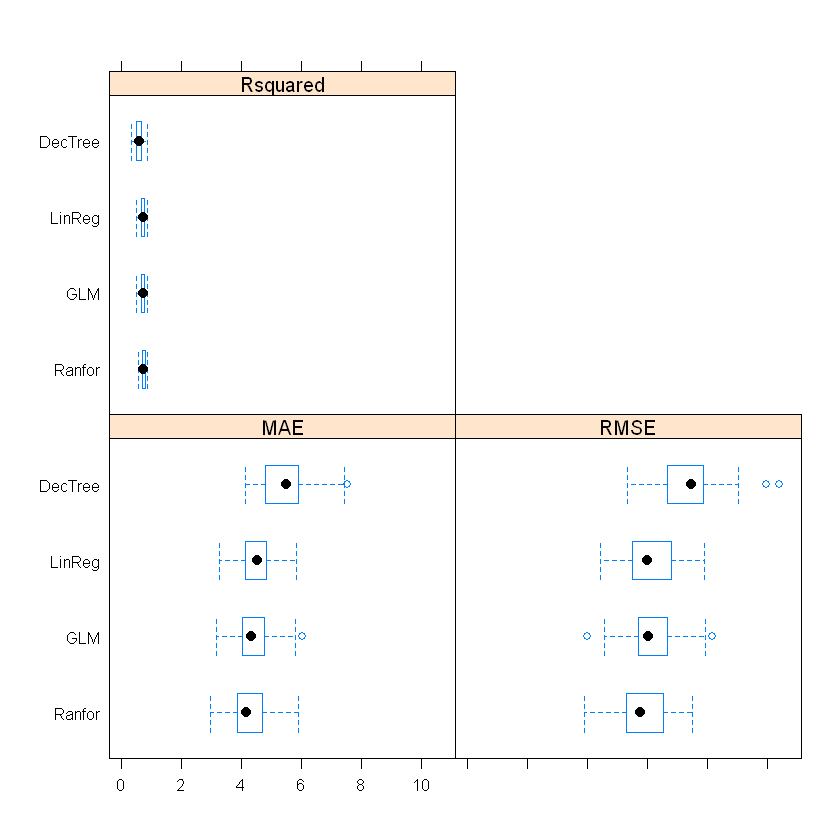

In [78]:
# Decision tree
hour13_dectree <- train(production~., 
                        train_hour13[,3:ncol(train_hour13)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour13_dectree

# Linear regression
hour13_linreg <- train(production~.,
                       train_hour13[,3:ncol(train_hour13)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour13_linreg

# Random forest
hour13_ranfor <- train(production~.,
                       train_hour13[,3:ncol(train_hour13)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour13_ranfor

# GLM
hour13_glm <- train(production~.,
                    method = "glm",
                    train_hour13[,3:ncol(train_hour13)],
                    trControl = fitControl,
                    tuneLength = 5)

hour13_glm
summary(hour13_glm)

# Model Comparison
Comp13 <- resamples(list(Ranfor = hour13_ranfor, LinReg=hour13_linreg, DecTree=hour13_dectree, GLM = hour13_glm))
Comp13
summary(Comp13)
bwplot(Comp13)

### Hour 14

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 350, 347, 347, 346, 346, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.03613630   8.482160  0.4923468  6.535402
  0.03767359   8.545560  0.4851862  6.611078
  0.05837295   8.862827  0.4440412  7.057248
  0.06606006   8.970403  0.4294316  7.217632
  0.44996654  10.825758  0.3630601  9.222698

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0361363.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 349, 348, 347, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  7.030924  0.6449752  5.183415

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 347, 347, 348, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.721393  0.6771138  4.948469

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 347, 347, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  7.039618  0.6440079  5.168534



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-31.3779   -3.6963    0.6632    3.4176   23.8732  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -26.542187  25.751448  -1.031 0.303348    
avg_cloud        -0.071006   0.031630  -2.245 0.025362 *  
avg_temp         -0.363750   0.213747  -1.702 0.089633 .  
avg_dswrf         0.001196   0.006268   0.191 0.848752    
avg_hum          -0.242625   0.052150  -4.652 4.57e-06 ***
production_lag1   0.402069   0.046387   8.668  < 2e-16 ***
avg_cloud_lag1    0.005081   0.033579   0.151 0.879814    
avg_temp_lag1     0.126752   0.217244   0.583 0.559942    
avg_dswrf_lag1    0.001580   0.006560   0.241 0.809775    
avg_hum_lag1      0.180388   0.053184   3.392 0.000769 ***
production_lag7   0.249295   0.046193   5.397 1.21e-07 ***
avg_cloud_lag7    0.095769   0.028117   3.406 0.000731 ***
avg_temp_lag7     0.371611   0.109639   3.389 0.000775 ***
avg_dswrf_lag7    0.001


Call:
resamples.default(x = list(Ranfor = hour14_ranfor, LinReg =
 hour14_linreg, DecTree = hour14_dectree, GLM = hour14_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp14)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  3.953139 4.665383 4.938024 4.948469 5.248989 6.350408    0
LinReg  3.739286 4.566854 5.231017 5.183415 5.641807 6.979435    0
DecTree 5.019394 5.776788 6.402404 6.535402 7.242794 9.262404    0
GLM     3.768875 4.788394 5.083729 5.168534 5.516298 6.733772    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Ranfor  5.145371 6.176509 6.721852 6.721393 7.287917  8.185872    0
LinReg  4.648502 6.120511 6.975030 7.030924 7.820105  9.786124    0
DecTree 6.442865 7.466619 8.239857 8.482160 9.363057 11.594718    0
GLM     4.957170 6.411686 7.130798 7.039618 7.827788  8.884904    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.4477172 0.6200524 0.6665691 0.6771138 0.7433876 0.8507564    0
LinReg  0.4330218 0.5636474 0.6577632 0.6449752 0

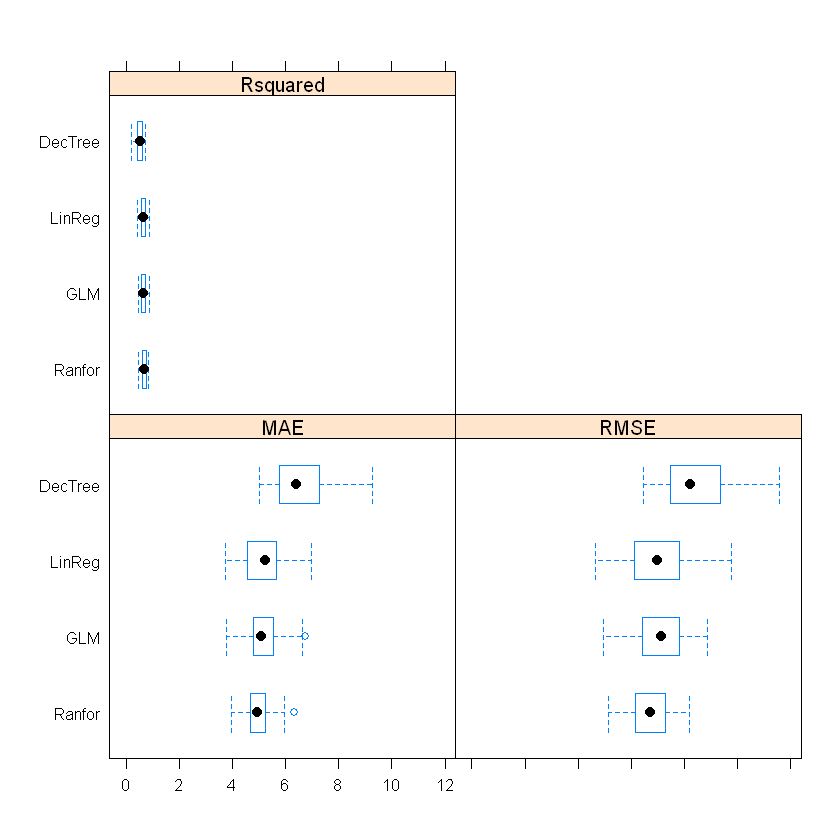

In [79]:
# Decision tree
hour14_dectree <- train(production~., 
                        train_hour14[,3:ncol(train_hour14)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour14_dectree

# Linear regression
hour14_linreg <- train(production~.,
                       train_hour14[,3:ncol(train_hour14)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour14_linreg

# Random forest
hour14_ranfor <- train(production~.,
                       train_hour14[,3:ncol(train_hour14)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour14_ranfor

# GLM
hour14_glm <- train(production~.,
                    method = "glm",
                    train_hour14[,3:ncol(train_hour14)],
                    trControl = fitControl,
                    tuneLength = 5)

hour14_glm
summary(hour14_glm)

# Model Comparison
Comp14 <- resamples(list(Ranfor = hour14_ranfor, LinReg=hour14_linreg, DecTree=hour14_dectree, GLM = hour14_glm))
Comp14
summary(Comp14)
bwplot(Comp14)

### Hour 15

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 346, 348, 348, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.01770430   8.534451  0.5171210  6.427129
  0.04182895   8.683453  0.4947789  6.724183
  0.04897143   8.922283  0.4676968  7.114134
  0.08241100   9.387389  0.4114433  7.657182
  0.40988826  11.151945  0.3127041  9.415375

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0177043.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 347, 348, 347, 346, 349, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  7.769611  0.5943166  5.884998

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 349, 347, 347, 349, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  7.335804  0.6399123  5.448331

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 348, 346, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  7.737056  0.6038362  5.847604



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-36.506   -3.759    1.088    4.511   19.449  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -29.623634  28.557946  -1.037  0.30026    
avg_cloud        -0.077622   0.035244  -2.202  0.02825 *  
avg_temp         -0.049754   0.239984  -0.207  0.83587    
avg_dswrf         0.001787   0.006842   0.261  0.79409    
avg_hum          -0.243377   0.057661  -4.221 3.06e-05 ***
production_lag1   0.308857   0.047818   6.459 3.30e-10 ***
avg_cloud_lag1    0.013504   0.037463   0.360  0.71871    
avg_temp_lag1    -0.170782   0.243882  -0.700  0.48420    
avg_dswrf_lag1    0.005046   0.007210   0.700  0.48446    
avg_hum_lag1      0.161961   0.059225   2.735  0.00654 ** 
production_lag7   0.265653   0.047873   5.549 5.46e-08 ***
avg_cloud_lag7    0.093728   0.031265   2.998  0.00290 ** 
avg_temp_lag7     0.371956   0.122724   3.031  0.00261 ** 
avg_dswrf_lag7   -0.001187   0.00


Call:
resamples.default(x = list(Ranfor = hour15_ranfor, LinReg =
 hour15_linreg, DecTree = hour15_dectree, GLM = hour15_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp15)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  3.712147 4.822749 5.517042 5.448331 5.933710 7.337774    0
LinReg  4.337102 5.310663 5.723352 5.884998 6.463671 7.755302    0
DecTree 5.028344 5.851145 6.307472 6.427129 7.046566 8.226632    0
GLM     4.435477 5.426725 5.888517 5.847604 6.299963 7.769398    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  5.194530 6.449525 7.361681 7.335804 8.015177 10.52242    0
LinReg  5.496080 6.907757 7.385844 7.769611 8.336117 11.06807    0
DecTree 6.598381 7.652604 8.357324 8.534451 9.421166 10.85448    0
GLM     5.464478 6.982807 7.646900 7.737056 8.139656 10.78014    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.3293111 0.5775326 0.6347095 0.6399123 0.7312853 0.8216482    0
LinReg  0.2478974 0.5380618 0.6273764 0.5943166 0.6924

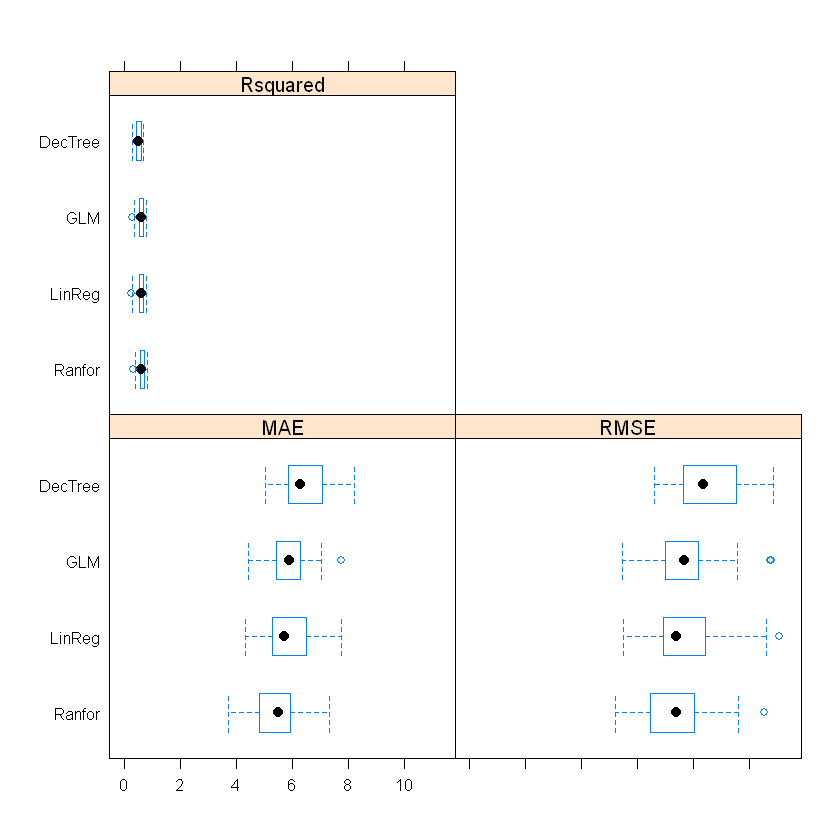

In [80]:
# Decision tree
hour15_dectree <- train(production~., 
                        train_hour15[,3:ncol(train_hour15)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour15_dectree

# Linear regression
hour15_linreg <- train(production~.,
                       train_hour15[,3:ncol(train_hour15)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour15_linreg

# Random forest
hour15_ranfor <- train(production~.,
                       train_hour15[,3:ncol(train_hour15)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour15_ranfor

# GLM
hour15_glm <- train(production~.,
                    method = "glm",
                    train_hour15[,3:ncol(train_hour15)],
                    trControl = fitControl,
                    tuneLength = 5)

hour15_glm
summary(hour15_glm)

# Model Comparison
Comp15 <- resamples(list(Ranfor = hour15_ranfor, LinReg=hour15_linreg, DecTree=hour15_dectree, GLM = hour15_glm))
Comp15
summary(Comp15)
bwplot(Comp15)

### Hour 16

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 346, 349, 347, 347, 347, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE     
  0.01879565   7.172556  0.6478621  5.468532
  0.03304842   7.375797  0.6282648  5.788295
  0.05400300   7.602629  0.6039686  6.004198
  0.07040922   8.048998  0.5561057  6.564499
  0.53943775  10.798234  0.4458135  9.266732

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.01879565.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 346, 348, 348, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.424314  0.7171808  4.759792

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 348, 347, 347, 346, 348, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.147107  0.7409059  4.504397

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 348, 347, 347, 348, 349, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  6.436414  0.7125461  4.76547



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-30.3933   -2.8702    0.8127    3.1850   21.0453  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -62.551228  24.932597  -2.509   0.0125 *  
avg_cloud         0.013376   0.025688   0.521   0.6029    
avg_temp          0.339525   0.197688   1.717   0.0867 .  
avg_dswrf         0.034674   0.005232   6.628 1.20e-10 ***
avg_hum          -0.025487   0.047341  -0.538   0.5906    
production_lag1   0.243408   0.048717   4.996 9.01e-07 ***
avg_cloud_lag1   -0.019228   0.025833  -0.744   0.4572    
avg_temp_lag1    -0.240609   0.197300  -1.220   0.2234    
avg_dswrf_lag1   -0.011661   0.005641  -2.067   0.0394 *  
avg_hum_lag1      0.051292   0.047475   1.080   0.2807    
production_lag7   0.314309   0.049467   6.354 6.14e-10 ***
avg_cloud_lag7    0.036454   0.021115   1.726   0.0851 .  
avg_temp_lag7     0.135405   0.100045   1.353   0.1767    
avg_dswrf_lag7   -0.006


Call:
resamples.default(x = list(Ranfor = hour16_ranfor, LinReg =
 hour16_linreg, DecTree = hour16_dectree, GLM = hour16_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp16)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.885173 4.114622 4.562485 4.504397 4.841776 6.141025    0
LinReg  3.278010 4.335642 4.664759 4.759792 5.182285 7.266477    0
DecTree 3.743932 4.912569 5.293531 5.468532 5.978085 7.024364    0
GLM     3.537780 4.367609 4.740415 4.765470 5.084775 6.528064    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Ranfor  3.868989 5.509449 6.125457 6.147107 6.373416  9.133686    0
LinReg  4.311094 5.742951 6.288928 6.424314 7.068399 10.222967    0
DecTree 4.609596 6.393526 7.004267 7.172556 7.805980 10.117915    0
GLM     4.691867 5.787236 6.298210 6.436414 7.046617  9.111014    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.4698500 0.7099427 0.7537721 0.7409059 0.7952611 0.9032355    0
LinReg  0.3623390 0.6662421 0.7355293 0.7171808 0

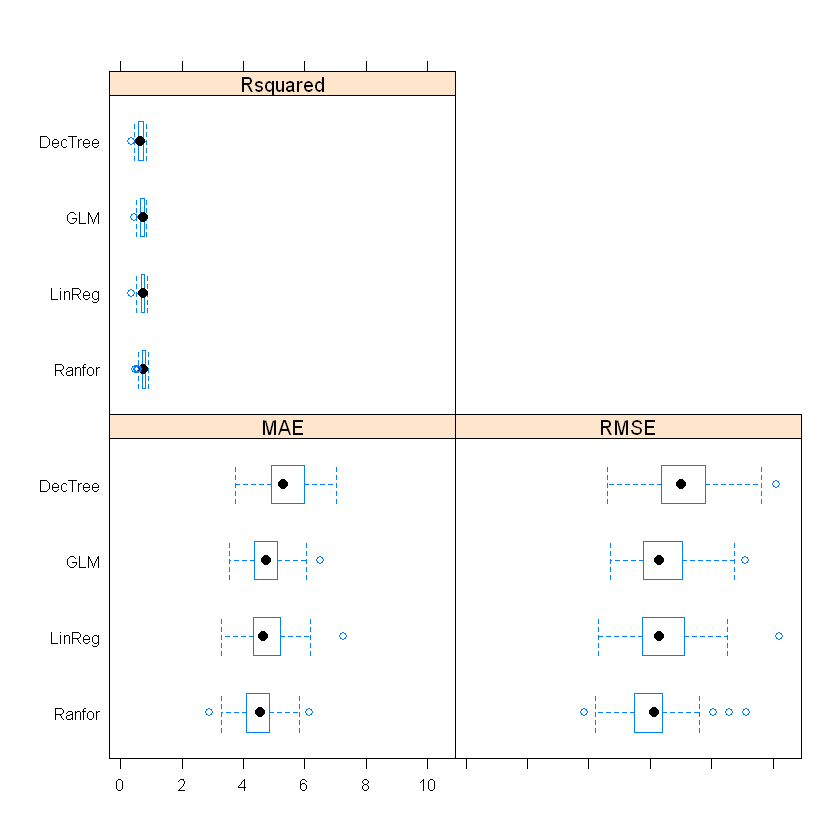

In [81]:
# Decision tree
hour16_dectree <- train(production~., 
                        train_hour16[,3:ncol(train_hour16)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour16_dectree

# Linear regression
hour16_linreg <- train(production~.,
                       train_hour16[,3:ncol(train_hour16)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour16_linreg

# Random forest
hour16_ranfor <- train(production~.,
                       train_hour16[,3:ncol(train_hour16)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour16_ranfor

# GLM
hour16_glm <- train(production~.,
                    method = "glm",
                    train_hour16[,3:ncol(train_hour16)],
                    trControl = fitControl,
                    tuneLength = 5)

hour16_glm
summary(hour16_glm)

# Model Comparison
Comp16 <- resamples(list(Ranfor = hour16_ranfor, LinReg=hour16_linreg, DecTree=hour16_dectree, GLM = hour16_glm))
Comp16
summary(Comp16)
bwplot(Comp16)

### Hour 17

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 346, 348, 348, 349, 346, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.01920559  4.577812  0.7528333  3.124884
  0.02869726  4.833569  0.7274073  3.385164
  0.05413299  5.175080  0.6885274  3.672102
  0.07626765  5.399436  0.6597937  4.100664
  0.63739611  7.612729  0.5737664  6.266699

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.01920559.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 346, 347, 348, 349, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  3.807126  0.8279608  2.57682

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 348, 347, 346, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.607713  0.8471066  2.267789

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 350, 348, 346, 347, 346, 348, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.822792  0.8305214  2.573148



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-20.3125   -1.2150    0.0273    1.7207   14.1592  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -47.275781  16.731230  -2.826  0.00497 ** 
avg_cloud         0.042243   0.014535   2.906  0.00388 ** 
avg_temp          0.201780   0.117164   1.722  0.08586 .  
avg_dswrf         0.032876   0.003559   9.237  < 2e-16 ***
avg_hum           0.037047   0.027795   1.333  0.18339    
production_lag1   0.377197   0.047978   7.862 4.13e-14 ***
avg_cloud_lag1   -0.012456   0.014655  -0.850  0.39588    
avg_temp_lag1    -0.034607   0.116721  -0.296  0.76702    
avg_dswrf_lag1   -0.013544   0.003819  -3.547  0.00044 ***
avg_hum_lag1     -0.005494   0.028030  -0.196  0.84472    
production_lag7   0.238120   0.046300   5.143 4.38e-07 ***
avg_cloud_lag7    0.004288   0.011957   0.359  0.72010    
avg_temp_lag7    -0.002591   0.059696  -0.043  0.96541    
avg_dswrf_lag7   -0.004


Call:
resamples.default(x = list(Ranfor = hour17_ranfor, LinReg =
 hour17_linreg, DecTree = hour17_dectree, GLM = hour17_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp17)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  1.637939 1.920243 2.167962 2.267789 2.485694 3.761716    0
LinReg  1.806949 2.192928 2.533070 2.576820 2.867325 3.555476    0
DecTree 2.423584 2.807873 3.080552 3.124884 3.377674 4.096886    0
GLM     1.735373 2.355085 2.556561 2.573148 2.824869 3.655616    0

RMSE 
            Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  2.175436 3.004272 3.381417 3.607713 4.001390 6.402222    0
LinReg  2.613428 3.091893 3.655092 3.807126 4.253064 5.583161    0
DecTree 3.193755 4.001796 4.348037 4.577812 5.263023 6.531597    0
GLM     2.391866 3.359858 3.782708 3.822792 4.288996 5.175146    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.5599670 0.8097266 0.8670391 0.8471066 0.9134342 0.9474134    0
LinReg  0.6260311 0.7830049 0.8470483 0.8279608 0.8895

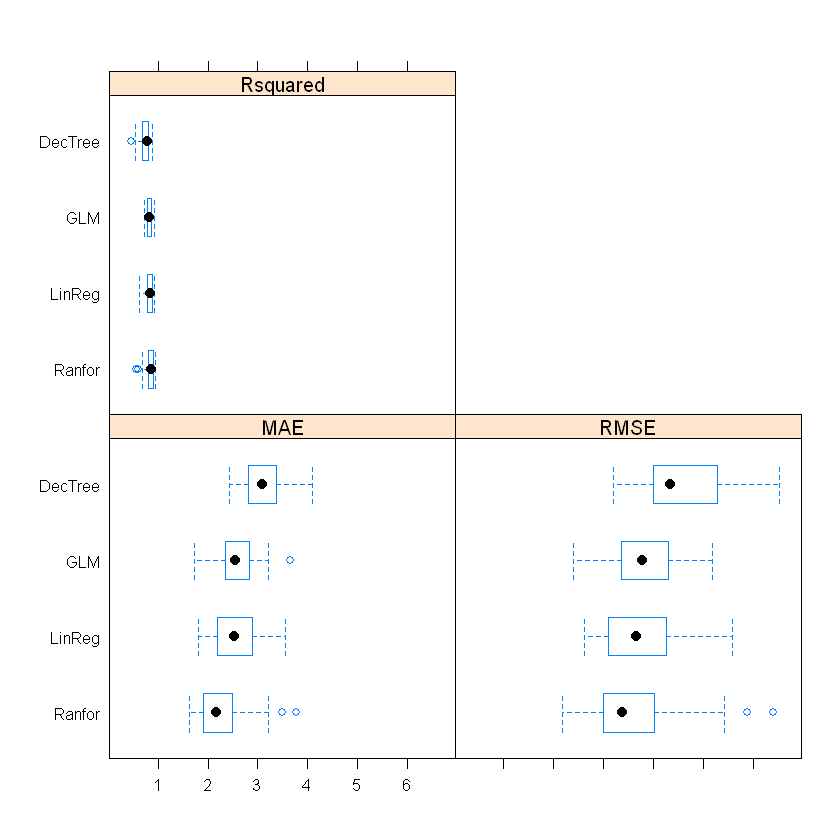

In [82]:
# Decision tree
hour17_dectree <- train(production~., 
                        train_hour17[,3:ncol(train_hour17)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour17_dectree

# Linear regression
hour17_linreg <- train(production~.,
                       train_hour17[,3:ncol(train_hour17)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour17_linreg

# Random forest
hour17_ranfor <- train(production~.,
                       train_hour17[,3:ncol(train_hour17)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour17_ranfor

# GLM
hour17_glm <- train(production~.,
                    method = "glm",
                    train_hour17[,3:ncol(train_hour17)],
                    trControl = fitControl,
                    tuneLength = 5)

hour17_glm
summary(hour17_glm)

# Model Comparison
Comp17 <- resamples(list(Ranfor = hour17_ranfor, LinReg=hour17_linreg, DecTree=hour17_dectree, GLM = hour17_glm))
Comp17
summary(Comp17)
bwplot(Comp17)

### Hour 18

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 346, 348, 349, 346, 349, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.01914863  1.681396  0.8066163  1.049116
  0.03041948  1.765523  0.7875420  1.128166
  0.05712553  1.860574  0.7625910  1.195169
  0.07662913  2.109443  0.6995309  1.436293
  0.69928453  3.264767  0.5736622  2.549832

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.01914863.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 349, 347, 346, 348, 348, 348, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  1.414126  0.862647  0.915608

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 349, 347, 347, 347, 347, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  1.219952  0.9006812  0.6312765

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 346, 347, 349, 347, 348, 349, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  1.424353  0.8620489  0.9161046



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4594  -0.5965   0.0304   0.5232   7.2015  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11.106065   5.835498  -1.903   0.0578 .  
avg_cloud         0.023623   0.005058   4.671 4.20e-06 ***
avg_temp          0.050130   0.043498   1.152   0.2499    
avg_dswrf         0.013559   0.001570   8.638  < 2e-16 ***
avg_hum           0.004235   0.009619   0.440   0.6600    
production_lag1   0.592993   0.041434  14.312  < 2e-16 ***
avg_cloud_lag1   -0.009415   0.005214  -1.806   0.0718 .  
avg_temp_lag1     0.012234   0.043807   0.279   0.7802    
avg_dswrf_lag1   -0.007764   0.001668  -4.655 4.52e-06 ***
avg_hum_lag1     -0.006449   0.009665  -0.667   0.5050    
production_lag7   0.170454   0.032777   5.200 3.29e-07 ***
avg_cloud_lag7   -0.003457   0.004198  -0.823   0.4108    
avg_temp_lag7    -0.021475   0.022006  -0.976   0.3298    
avg_dswrf_lag7   -0.002536   0.00


Call:
resamples.default(x = list(Ranfor = hour18_ranfor, LinReg =
 hour18_linreg, DecTree = hour18_dectree, GLM = hour18_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp18)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
             Min.   1st Qu.    Median      Mean   3rd Qu.     Max. NA's
Ranfor  0.3488642 0.5457863 0.6295066 0.6312765 0.7125073 1.159100    0
LinReg  0.5981904 0.7991956 0.9416537 0.9156080 0.9948412 1.336136    0
DecTree 0.7051380 0.8844008 1.0689500 1.0491158 1.1594942 1.487827    0
GLM     0.6747071 0.7912590 0.9229224 0.9161046 1.0320512 1.233092    0

RMSE 
             Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Ranfor  0.6161778 1.006294 1.177672 1.219952 1.449303 2.204588    0
LinReg  0.7885238 1.124171 1.359639 1.414126 1.669831 2.406544    0
DecTree 0.9772413 1.367771 1.655824 1.681396 1.873771 2.645822    0
GLM     0.8954181 1.113290 1.409215 1.424353 1.640795 2.177446    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.7179074 0.8693933 0.9115491 0.9006812 0.9456317 0.9843715    0
LinReg  0.6825561 0.8243

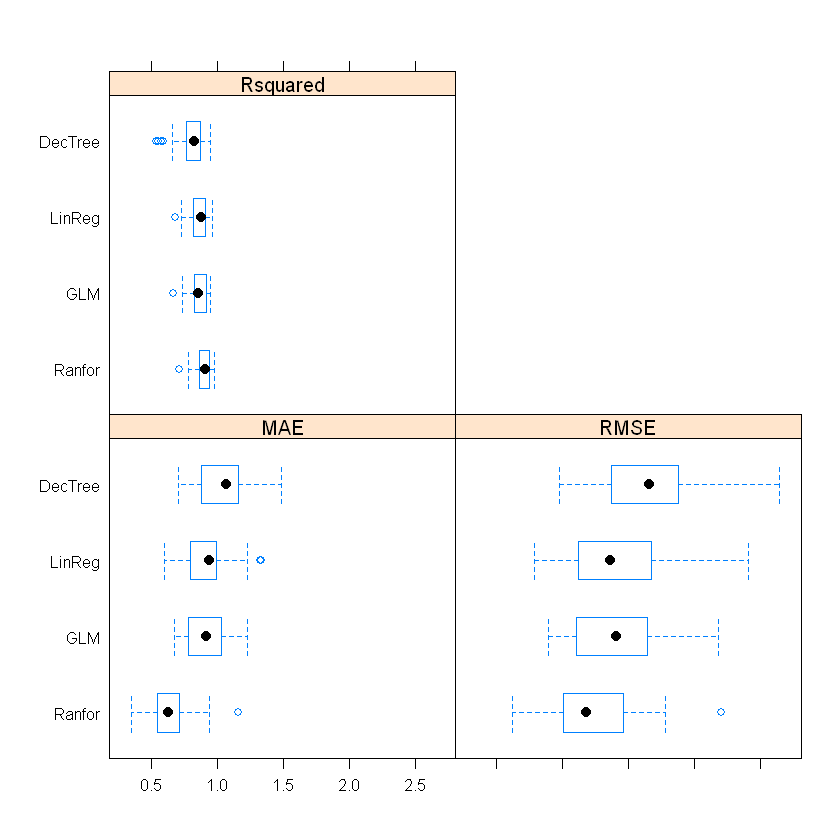

In [83]:
# Decision tree
hour18_dectree <- train(production~., 
                        train_hour18[,3:ncol(train_hour18)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour18_dectree

# Linear regression
hour18_linreg <- train(production~.,
                       train_hour18[,3:ncol(train_hour18)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour18_linreg

# Random forest
hour18_ranfor <- train(production~.,
                       train_hour18[,3:ncol(train_hour18)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour18_ranfor

# GLM
hour18_glm <- train(production~.,
                    method = "glm",
                    train_hour18[,3:ncol(train_hour18)],
                    trControl = fitControl,
                    tuneLength = 5)

hour18_glm
summary(hour18_glm)

# Model Comparison
Comp18 <- resamples(list(Ranfor = hour18_ranfor, LinReg=hour18_linreg, DecTree=hour18_dectree, GLM = hour18_glm))
Comp18
summary(Comp18)
bwplot(Comp18)

### Hour 19

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 347, 348, 347, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE      
  0.01273835  0.2561347  0.8171680  0.1263222
  0.01965203  0.2637152  0.8081413  0.1343204
  0.02595494  0.2714143  0.7969973  0.1439493
  0.04621329  0.2960434  0.7565656  0.1641277
  0.76425001  0.4322225  0.7069241  0.2960040

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.01273835.

Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 347, 348, 347, 347, 348, ... 
Resampling results:

  RMSE     Rsquared   MAE      
  0.24897  0.8255959  0.1302399

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 347, 347, 347, ... 
Resampling results:

  RMSE       Rsquared   MAE       
  0.1953479  0.8821507  0.08257538

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 347, 347, 348, 347, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2464435  0.8245382  0.1301267



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20102  -0.08663   0.00024   0.05250   2.67838  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.5642752  0.9964679  -1.570   0.1173    
avg_cloud        0.0007869  0.0009358   0.841   0.4009    
avg_temp         0.0205912  0.0083988   2.452   0.0147 *  
avg_dswrf        0.0003680  0.0003490   1.054   0.2924    
avg_hum         -0.0005647  0.0016024  -0.352   0.7247    
production_lag1  0.7471117  0.0351376  21.262   <2e-16 ***
avg_cloud_lag1   0.0007001  0.0009533   0.734   0.4632    
avg_temp_lag1   -0.0129411  0.0084400  -1.533   0.1261    
avg_dswrf_lag1  -0.0001145  0.0003533  -0.324   0.7460    
avg_hum_lag1     0.0005096  0.0016179   0.315   0.7530    
production_lag7  0.0060954  0.0078209   0.779   0.4363    
avg_cloud_lag7   0.0005679  0.0007411   0.766   0.4440    
avg_temp_lag7   -0.0019776  0.0041052  -0.482   0.6303    
avg_dswrf_lag7   0.0003


Call:
resamples.default(x = list(Ranfor = hour19_ranfor, LinReg =
 hour19_linreg, DecTree = hour19_dectree, GLM = hour19_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp19)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
              Min.    1st Qu.     Median       Mean    3rd Qu.      Max. NA's
Ranfor  0.04963131 0.06466128 0.07268024 0.08257538 0.09152988 0.1677927    0
LinReg  0.08734134 0.11333824 0.12404501 0.13023989 0.14251501 0.2002006    0
DecTree 0.08915284 0.10897061 0.11600512 0.12632220 0.13804676 0.2174935    0
GLM     0.07938183 0.11576366 0.12435634 0.13012671 0.14331490 0.2278300    0

RMSE 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.09895487 0.1376213 0.1598242 0.1953479 0.2003317 0.5118989    0
LinReg  0.12245754 0.1741553 0.2076553 0.2489700 0.2763379 0.5071334    0
DecTree 0.15137241 0.1926102 0.2421693 0.2561347 0.2778652 0.5134932    0
GLM     0.10741590 0.1702827 0.2150580 0.2464435 0.2554286 0.6201899    0

Rsquared 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Ranfor  0.4624222 0.8791423 0.9193946

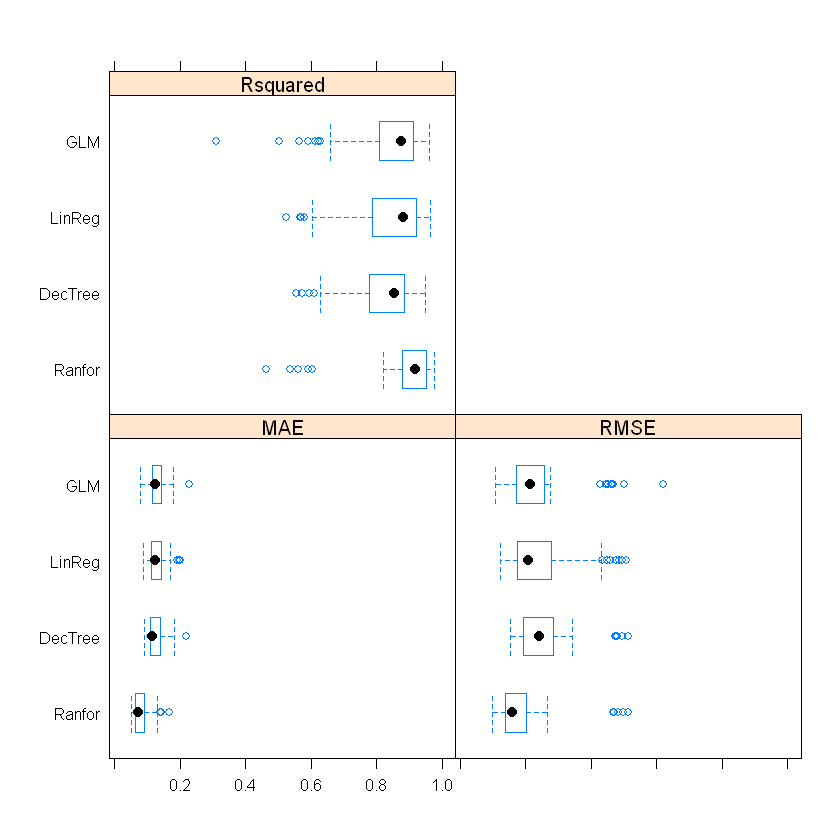

In [84]:
# Decision tree
hour19_dectree <- train(production~., 
                        train_hour19[,3:ncol(train_hour19)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour19_dectree

# Linear regression
hour19_linreg <- train(production~.,
                       train_hour19[,3:ncol(train_hour19)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour19_linreg

# Random forest
hour19_ranfor <- train(production~.,
                       train_hour19[,3:ncol(train_hour19)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour19_ranfor

# GLM
hour19_glm <- train(production~.,
                    method = "glm",
                    train_hour19[,3:ncol(train_hour19)],
                    trControl = fitControl,
                    tuneLength = 5)

hour19_glm
summary(hour19_glm)

# Model Comparison
Comp19 <- resamples(list(Ranfor = hour19_ranfor, LinReg=hour19_linreg, DecTree=hour19_dectree, GLM = hour19_glm))
Comp19
summary(Comp19)
bwplot(Comp19)

### Hour 20

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 347, 348, 347, 348, 348, ... 
Resampling results across tuning parameters:

  cp          RMSE        Rsquared  MAE        
  0.00000000  0.01448642  NaN       0.002516059
  0.01757885  0.01448642  NaN       0.002516059
  0.03515770  0.01448642  NaN       0.002516059
  0.05273655  0.01448642  NaN       0.002516059
  0.07031540  0.00882037  NaN       0.002445796

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.0703154.

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Linear Regression 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 348, 348, 348, 347, 347, 347, ... 
Resampling results:

  RMSE        Rsquared  MAE        
  0.01034093  NaN       0.003440193

Tuning parameter 'intercept' was held constant at a value of TRUE

Random Forest 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 348, 347, 347, ... 
Resampling results:

  RMSE        Rsquared  MAE        
  0.01200352  NaN       0.002783793

Tuning parameter 'mtry' was held constant at a value of 4
Tuning
 parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5

Generalized Linear Model 

386 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 347, 348, 347, 348, 348, 347, ... 
Resampling results:

  RMSE        Rsquared  MAE       
  0.01030305  NaN       0.00342569



Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.00911  -0.00292  -0.00117   0.00042   0.46605  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)     -2.181e-02  8.943e-02  -0.244    0.807
avg_cloud       -9.474e-05  8.672e-05  -1.092    0.275
avg_temp         5.104e-05  7.902e-04   0.065    0.949
avg_dswrf       -4.337e-05  3.895e-05  -1.113    0.266
avg_hum          9.413e-05  1.297e-04   0.726    0.468
production_lag1  7.947e-04  5.218e-02   0.015    0.988
avg_cloud_lag1   7.594e-05  8.855e-05   0.858    0.392
avg_temp_lag1   -2.009e-04  7.877e-04  -0.255    0.799
avg_dswrf_lag1   5.054e-05  3.962e-05   1.276    0.203
avg_hum_lag1    -4.756e-05  1.318e-04  -0.361    0.718
production_lag7 -1.687e-04  7.871e-04  -0.214    0.830
avg_cloud_lag7  -7.301e-06  6.829e-05  -0.107    0.915
avg_temp_lag7    2.227e-04  3.843e-04   0.580    0.563
avg_dswrf_lag7   2.684e-06  3.220e-05   0.083    0.934

(Dispersion parameter f


Call:
resamples.default(x = list(Ranfor = hour20_ranfor, LinReg =
 hour20_linreg, DecTree = hour20_dectree, GLM = hour20_glm))

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 
Performance metrics: MAE, RMSE, Rsquared 
Time estimates for: everything, final model fit 


Call:
summary.resamples(object = Comp20)

Models: Ranfor, LinReg, DecTree, GLM 
Number of resamples: 50 

MAE 
                Min.     1st Qu.      Median        Mean     3rd Qu.       Max.
Ranfor  0.0004312547 0.001130571 0.001566072 0.002783793 0.002461128 0.01242105
LinReg  0.0016153592 0.002303727 0.002499943 0.003440193 0.002896184 0.01242105
DecTree 0.0013563218 0.001356322 0.001360231 0.002445796 0.001360231 0.01242105
GLM     0.0019558474 0.002242204 0.002528779 0.003425690 0.002742492 0.01210256
        NA's
Ranfor     0
LinReg     0
DecTree    0
GLM        0

RMSE 
               Min.     1st Qu.      Median       Mean     3rd Qu.       Max.
Ranfor  0.001288127 0.003218447 0.004492077 0.01200352 0.007307551 0.07656851
LinReg  0.002154249 0.002809014 0.003102717 0.01034093 0.003381504 0.07656851
DecTree 0.001356322 0.001356322 0.001360231 0.00882037 0.001360231 0.07656851
GLM     0.002489514 0.002758922 0.003116455 0.01030305 0.003330398 0.07558049
        NA's
Ranfor     0


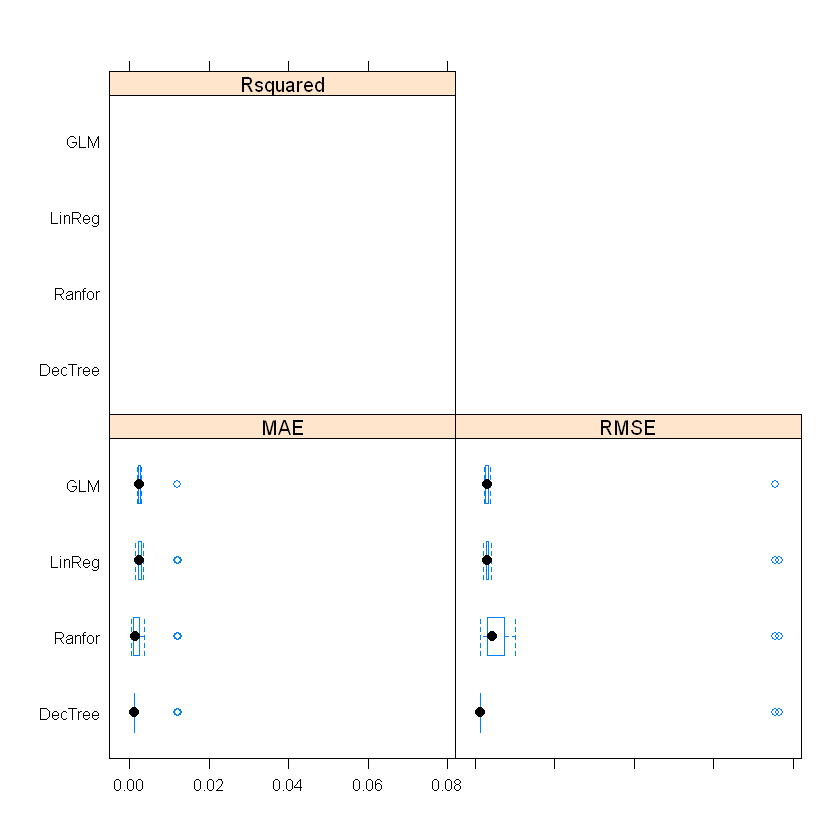

In [85]:
# Decision tree
hour20_dectree <- train(production~., 
                        train_hour20[,3:ncol(train_hour20)],
                        method = "rpart",
                        trControl = fitControl,
                        tuneLength = 5,
                        cp=0.03190291)
hour20_dectree

# Linear regression
hour20_linreg <- train(production~.,
                       train_hour20[,3:ncol(train_hour20)],
                       method = "lm",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(intercept = TRUE))

hour20_linreg

# Random forest
options(warn=-1)

hour20_ranfor <- train(production~.,
                       train_hour20[,3:ncol(train_hour20)],
                       method = "ranger",
                       trControl = fitControl,
                       tuneLength = 5,
                       tuneGrid = expand.grid(mtry = 4, splitrule = "variance", min.node.size = 5))

hour20_ranfor

# GLM
hour20_glm <- train(production~.,
                    method = "glm",
                    train_hour20[,3:ncol(train_hour20)],
                    trControl = fitControl,
                    tuneLength = 5)

hour20_glm
summary(hour20_glm)

options(warn=1)

# Model Comparison
Comp20 <- resamples(list(Ranfor = hour20_ranfor, LinReg=hour20_linreg, DecTree=hour20_dectree, GLM = hour20_glm))
Comp20
summary(Comp20)
bwplot(Comp20)

Overall, random forest model performed better in the majority of the hours. So we choose random forest for the rest of the analysis.

In [86]:
# Test predictions
hour05predtest <- predict(hour05_ranfor$finalModel, data = test_hour05)
hour06predtest <- predict(hour06_ranfor$finalModel, data = test_hour06)
hour07predtest <- predict(hour07_ranfor$finalModel, data = test_hour07)
hour08predtest <- predict(hour08_ranfor$finalModel, data = test_hour08)
hour09predtest <- predict(hour09_ranfor$finalModel, data = test_hour09)
hour10predtest <- predict(hour10_ranfor$finalModel, data = test_hour10)
hour11predtest <- predict(hour11_ranfor$finalModel, data = test_hour11)
hour12predtest <- predict(hour12_ranfor$finalModel, data = test_hour12)
hour13predtest <- predict(hour13_ranfor$finalModel, data = test_hour13)
hour14predtest <- predict(hour14_ranfor$finalModel, data = test_hour14)
hour15predtest <- predict(hour15_ranfor$finalModel, data = test_hour15)
hour16predtest <- predict(hour16_ranfor$finalModel, data = test_hour16)
hour17predtest <- predict(hour17_ranfor$finalModel, data = test_hour17)
hour18predtest <- predict(hour18_ranfor$finalModel, data = test_hour18)
hour19predtest <- predict(hour19_ranfor$finalModel, data = test_hour19)
hour20predtest <- predict(hour20_ranfor$finalModel, data = test_hour20)

In [87]:
# Test predictions are merged with test data set for each hour.
test_hour05merged<-test_hour05%>%select(date, hour, production)%>%mutate(Prediction=hour05predtest$predictions)
test_hour06merged<-test_hour06%>%select(date, hour, production)%>%mutate(Prediction=hour06predtest$predictions)
test_hour07merged<-test_hour07%>%select(date, hour, production)%>%mutate(Prediction=hour07predtest$predictions)
test_hour08merged<-test_hour08%>%select(date, hour, production)%>%mutate(Prediction=hour08predtest$predictions)
test_hour09merged<-test_hour09%>%select(date, hour, production)%>%mutate(Prediction=hour09predtest$predictions)
test_hour10merged<-test_hour10%>%select(date, hour, production)%>%mutate(Prediction=hour10predtest$predictions)
test_hour11merged<-test_hour11%>%select(date, hour, production)%>%mutate(Prediction=hour11predtest$predictions)
test_hour12merged<-test_hour12%>%select(date, hour, production)%>%mutate(Prediction=hour12predtest$predictions)
test_hour13merged<-test_hour13%>%select(date, hour, production)%>%mutate(Prediction=hour13predtest$predictions)
test_hour14merged<-test_hour14%>%select(date, hour, production)%>%mutate(Prediction=hour14predtest$predictions)
test_hour15merged<-test_hour15%>%select(date, hour, production)%>%mutate(Prediction=hour15predtest$predictions)
test_hour16merged<-test_hour16%>%select(date, hour, production)%>%mutate(Prediction=hour16predtest$predictions)
test_hour17merged<-test_hour17%>%select(date, hour, production)%>%mutate(Prediction=hour17predtest$predictions)
test_hour18merged<-test_hour18%>%select(date, hour, production)%>%mutate(Prediction=hour18predtest$predictions)
test_hour19merged<-test_hour19%>%select(date, hour, production)%>%mutate(Prediction=hour19predtest$predictions)
test_hour20merged<-test_hour20%>%select(date, hour, production)%>%mutate(Prediction=hour20predtest$predictions)

In [89]:
# Tests in each hour with predictions are binded.
test_merged <- rbind(test_hour05merged,
                     test_hour06merged,
                     test_hour07merged,
                     test_hour08merged,
                     test_hour09merged,
                     test_hour10merged,
                     test_hour11merged,
                     test_hour12merged,
                     test_hour13merged,
                     test_hour14merged,
                     test_hour15merged,
                     test_hour16merged,
                     test_hour17merged,
                     test_hour18merged,
                     test_hour19merged,
                     test_hour20merged)%>% arrange(date, hour)
test_merged

date,hour,production,Prediction
<date>,<int>,<dbl>,<dbl>
2022-03-01,5,0.00,0.000000e+00
2022-03-01,6,0.00,1.596522e-04
2022-03-01,7,0.53,2.243447e-01
2022-03-01,8,3.65,4.462818e+00
2022-03-01,9,14.61,6.544512e+00
2022-03-01,10,22.67,1.685492e+01
2022-03-01,11,26.68,1.959503e+01
2022-03-01,12,10.92,1.896727e+01
2022-03-01,13,12.03,1.557425e+01


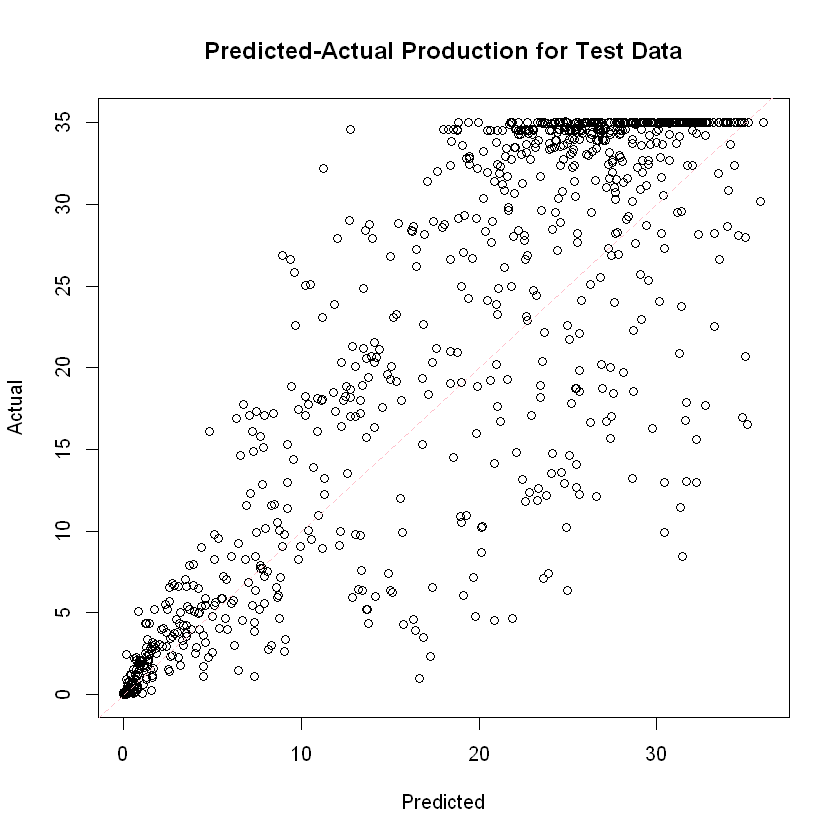

In [99]:
# Scatter Plot of Actual vs Predicted values for test set
plot(test_merged$Prediction, test_merged$production, xlab = "Predicted", ylab = "Actual",
     main = "Predicted-Actual Production for Test Data")

abline(a=0,b=1,col='pink', lty = 2)

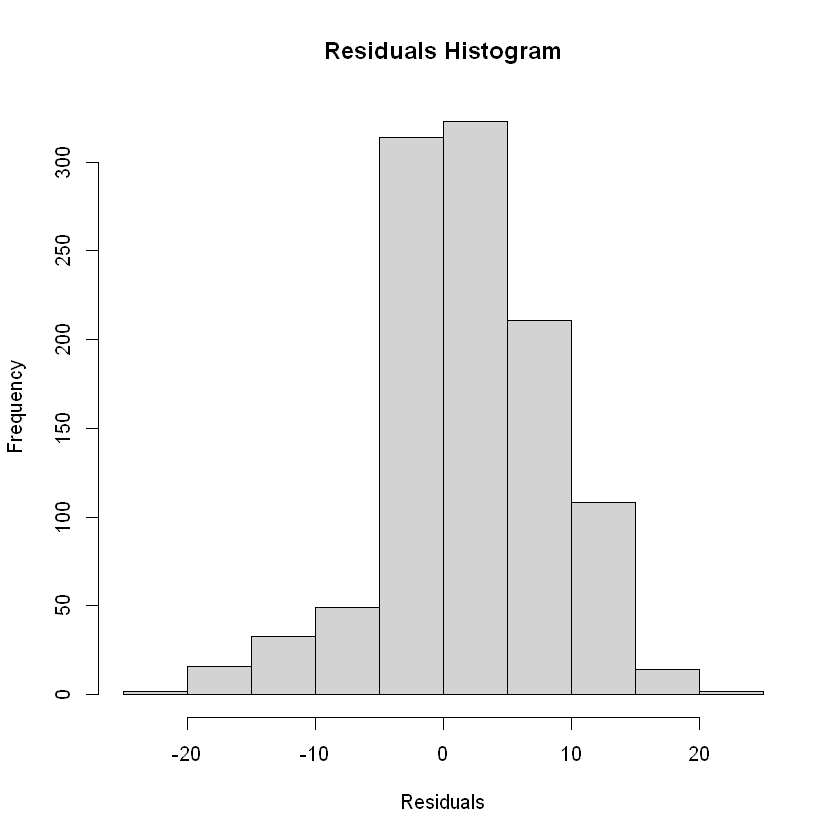

In [92]:
# Histogram of residuals for test set
rf_residual_test <- test_merged$production - test_merged$Prediction
hist(rf_residual_test, xlab = "Residuals", main = "Residuals Histogram")

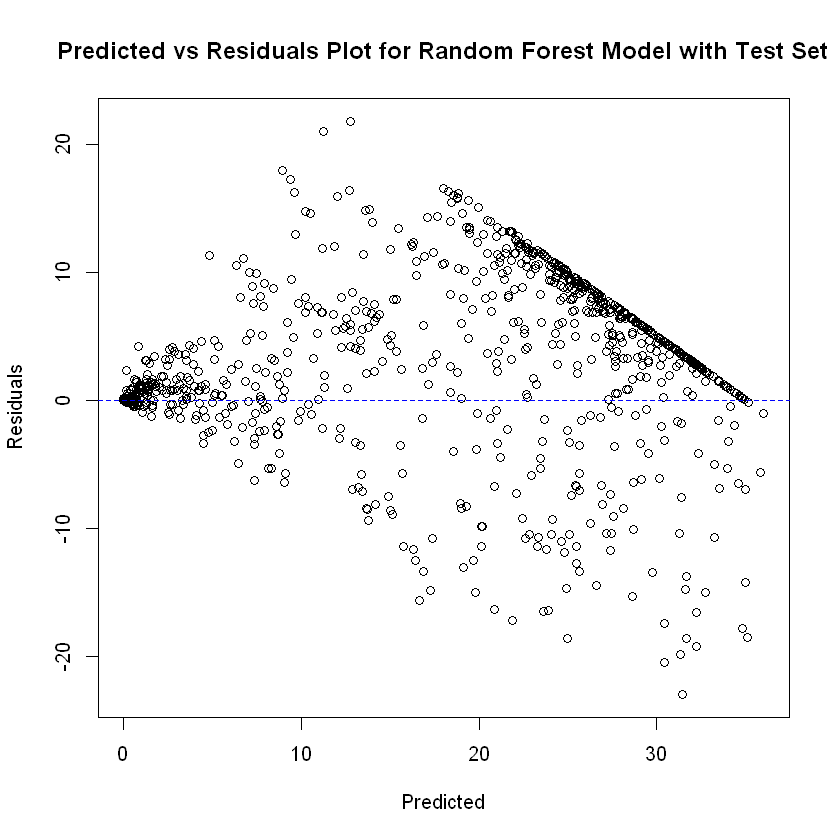

In [98]:
# Scatter Plot of Predicted vs Residuals values for test set
plot(test_merged$Prediction, rf_residual_test, xlab = "Predicted", ylab = "Residuals",
     main = "Predicted vs Residuals Plot for Random Forest Model with Test Set")
abline(h = 0, col = "blue", lty = 2)

In [95]:
# RMSE of test set predictions
RMSE(test_merged$production, test_merged$Prediction, na.rm = TRUE)

[1] 22.7892

## Conclusion

We observe that when the production approaches upper limits, model starts to deviate and starts underestimating. This can be observed in both residuals graphs and test vs prediction plots.

Some reasons that may be causing this deviation are:

1- We observe the deviation at upper levels of production. When we inspect the data set and production plots, it seems like there is an upper limit to the production around 35. This is sensible with the reality, as solar panels themselves have an upper limit they can produce, after which point increaced environmental parameters doesn't result in increaced production. However, models doesn't have this upper boundry, which may have caused errors during training.

2- Another regression models that was not tried here may have resulted in a better fit.